<a href="https://colab.research.google.com/github/NafiulVega/Machine-Learning-TI-3E-2024/blob/main/21_Nafiul%20Alam%20Dary%20Vega/Jobsheet%2004/ML_Jobsheet_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biodata
*   Nama : Nafi'ul Alam Dary Vega
*   NIM : 2241720048
*   Kelas : TI-3E
*   Jobsheet 03

# Praktikum 1
Klasifikasi SVM dengan Data Dummy

In [73]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

*Penjelasan :*
1. **import numpy as n**p: Mengimpor library NumPy dan memberikan alias np untuk mempermudah penggunaan. NumPy digunakan untuk operasi numerik dan array di Python.
2. **import matplotlib.pyplot as plt**: Mengimpor modul pyplot dari library Matplotlib dan memberikan alias plt. Matplotlib digunakan untuk membuat visualisasi data seperti plot dan grafik.
3. **from scipy import stats**: Mengimpor modul stats dari library SciPy. SciPy menyediakan fungsi dan algoritma untuk komputasi ilmiah, termasuk statistik.
4. **import seaborn as sns**: Mengimpor library Seaborn dan memberikan alias sns. Seaborn dibangun di atas Matplotlib dan menyediakan antarmuka tingkat tinggi untuk membuat visualisasi statistik yang menarik.

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

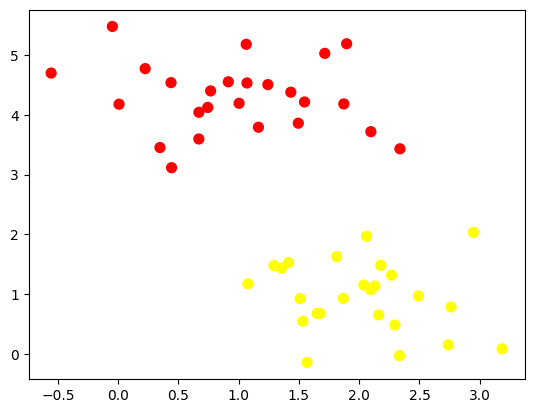

In [74]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

*Penjelasan :*
1. **from sklearn.datasets import make_blobs**: Mengimpor fungsi make_blobs dari modul sklearn.datasets. Fungsi ini digunakan untuk menghasilkan dataset sintetis berupa gumpalan data (blobs) dengan distribusi Gaussian.
2. **X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)**:
  *   Memanggil fungsi make_blobs untuk membuat dataset.
  *   **n_samples=50**: Menentukan jumlah sampel data, yaitu 50.
  *   **centers=2**: Menentukan jumlah cluster atau pusat gumpalan data, yaitu 2.
  *   **random_state=0**: Menentukan seed untuk generator angka acak, sehingga output data akan selalu sama setiap kali kode dijalankan.
  *   **cluster_std=0.60**: Menentukan standar deviasi dari cluster, yang mengontrol seberapa tersebar data di dalam cluster.
  *   Output fungsi make_blobs berupa dua variabel:
    *   **X**: berisi data fitur (koordinat x dan y dari setiap titik data).
    *   **y**: berisi label kelas untuk setiap titik data (0 atau 1, karena ada dua cluster).
3. **plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')**:
  *   Membuat scatter plot menggunakan Matplotlib.
  *   **X[:, 0]**: Mengambil semua baris (:) dan kolom pertama (0) dari data X, yaitu koordinat x dari setiap titik data.
  *   **X[:, 1]**: Mengambil semua baris (:) dan kolom kedua (1) dari data X, yaitu koordinat y dari setiap titik data.
  *   **c=y**: Memberi warna pada titik data berdasarkan label kelas (y).
  *   **s=50**: Menentukan ukuran marker (titik data) pada plot.
  *   **cmap='autumn'**: Menentukan colormap yang digunakan untuk mewarnai titik data.

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

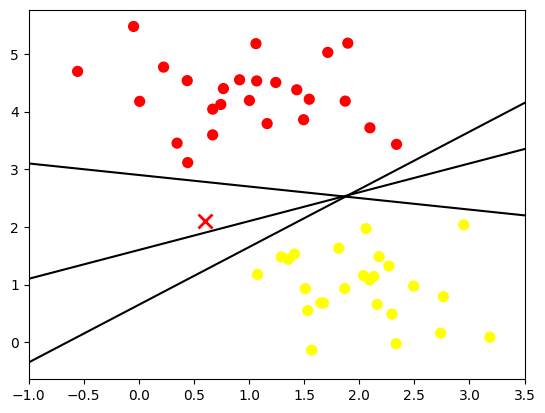

In [75]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

*Penjelasan :*
1. **xfit = np.linspace(-1, 3.5)**: Membuat array xfit berisi nilai-nilai yang terdistribusi secara merata dari -1 hingga 3.5. Array ini digunakan untuk membuat garis lurus pada plot.
2. **plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')**: Membuat scatter plot dari data X dan y.
  *   **X[:, 0]**: Mengambil semua baris (:) dan kolom pertama (0) dari data X, yaitu koordinat x dari setiap titik data.
  *   **X[:, 1]**: Mengambil semua baris (:) dan kolom kedua (1) dari data X, yaitu koordinat y dari setiap titik data.
  *   **c=y**: Memberi warna pada titik data berdasarkan label kelas (y).
  *   **s=50**: Menentukan ukuran marker (titik data) pada plot.
  *   **cmap='autumn'**: Menentukan colormap yang digunakan untuk mewarnai titik data.
3. **plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)**: Menambahkan titik 'x' berwarna merah pada koordinat (0.6, 2.1) sebagai titik data baru.
  *   markeredgewidth dan markersize mengatur ketebalan garis dan ukuran marker.
4. **for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:**: Looping untuk menggambar beberapa garis lurus dengan gradien (m) dan intercept (b) yang berbeda.
  *   Setiap tuple (m, b) merepresentasikan satu garis.
5. **plt.plot(xfit, m * xfit + b, '-k')**: Menggambar garis lurus pada plot.
  *   xfit adalah nilai x, m * xfit + b menghitung nilai y berdasarkan persamaan garis y = mx + b.
  *   -k menentukan warna garis hitam dengan gaya garis solid.
6. **plt.xlim(-1, 3.5)**: Menetapkan batas sumbu x dari -1 hingga 3.5.

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

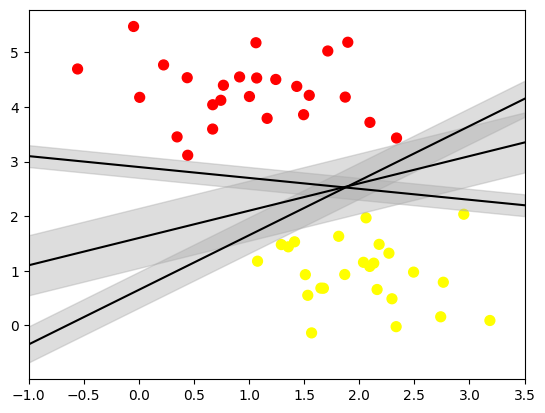

In [76]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

*Penjelasan :*
1. **xfit = np.linspace(-1, 3.5)**: Membuat array xfit berisi nilai-nilai yang terdistribusi secara merata dari -1 hingga 3.5. Array ini digunakan untuk membuat garis lurus pada plot.
2. **plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')**: Membuat scatter plot dari data X dan y.
  *   **X[:, 0]**: Mengambil semua baris (:) dan kolom pertama (0) dari data X, yaitu koordinat x dari setiap titik data.
  *   **X[:, 1]**: Mengambil semua baris (:) dan kolom kedua (1) dari data X, yaitu koordinat y dari setiap titik data.
  *   **c=y**: Memberi warna pada titik data berdasarkan label kelas (y).
  *   **s=50**: Menentukan ukuran marker (titik data) pada plot.
  *   **cmap='autumn'**: Menentukan colormap yang digunakan untuk mewarnai titik data.
3. **for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:**: Looping untuk menggambar garis dan margin.
  *   Setiap tuple (m, b, d) merepresentasikan satu garis dan marginnya.
  *   **m**: Kemiringan garis (slope)
  *   **b**: Intercept garis
  *   **d**: Jarak margin dari garis
4. yfit = m * xfit + b **bold text**: Menghitung nilai y (yfit) untuk setiap nilai x (xfit) pada garis.
5. **plt.plot(xfit, yfit, '-k')**: Menggambar garis lurus pada plot.
  *   **xfit**: adalah nilai x.
  *   **yfit**: adalah nilai y yang dihitung pada langkah sebelumnya.
  *   **-k**: menentukan warna garis hitam dengan gaya garis solid.
6. **plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)**: Menggambar area berwarna (margin) di sekitar garis.
  *   **xfit**: adalah nilai x.
  *   **yfit - d**: Batas bawah margin.
  *   **yfit + d**: Batas atas margin.
  *   **edgecolor='none'**: Tidak ada garis tepi pada margin.
  *   **color='#AAAAAA'**: Warna abu-abu untuk margin.
  *   **alpha=0.4**: Transparansi margin.
7. **plt.xlim(-1, 3.5)**: Menetapkan batas sumbu x dari -1 hingga 3.5.

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

**Penerappan fitting SVM**

In [77]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

*Penjelasan :*
1. **from sklearn.svm import SVC**: Mengimpor kelas SVC dari modul sklearn.svm. Kelas ini digunakan untuk membuat model SVC.
2. **model = SVC(kernel='linear', C=1E10)**: Membuat objek model dari kelas SVC dengan parameter berikut:
  *   **kernel='linear'**: Menentukan kernel linear untuk model SVC. Kernel linear digunakan untuk data yang dapat dipisahkan secara linear.
  *   **C=1E10**: Menentukan nilai parameter penalti C. Nilai C yang besar menunjukkan bahwa model akan memberikan penalti yang besar untuk kesalahan klasifikasi. Nilai 1E10 menunjukkan nilai C yang sangat besar.
3. **model.fit(X, y)**: Melatih model SVC dengan data X (fitur) dan y (label).

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [78]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

*Penjelasan :*
1. **def plot_svc_decision_function(model, ax=None, plot_support=True)**: Mendefinisikan fungsi dengan nama plot_svc_decision_function. \
Fungsi ini menerima tiga parameter:
  *   **model**: Objek SVM model yang akan diplot.
  *   **ax**: Objek matplotlib.axes.Axes yang digunakan untuk memplot (opsional). Jika tidak diberikan, akan digunakan axes aktif.
  *   **plot_support**: Boolean yang menentukan apakah akan memplot support vectors (opsional). Defaultnya adalah True.
2. **if ax is None**: Memeriksa apakah ax diberikan. Jika tidak, maka:
3. **ax = plt.gca()**: Mengambil axes aktif dari plot saat ini menggunakan plt.gca().
4. **xlim = ax.get_xlim()**: Mendapatkan batas-batas horizontal (x-axis) dari axes.
5. **ylim = ax.get_ylim()**: Mendapatkan batas-batas vertikal (y-axis) dari axes.
6. **x = np.linspace(xlim[0], xlim[1], 30)**: Membuat array x dengan 30 nilai yang tersebar secara linear antara batas-batas horizontal.
7. **y = np.linspace(ylim[0], ylim[1], 30)**: Membuat array y dengan 30 nilai yang tersebar secara linear antara batas-batas vertikal.
8. **Y, X = np.meshgrid(y, x)**: Membuat grid 2D dari nilai-nilai x dan y menggunakan np.meshgrid.
9. **xy = np.vstack([X.ravel(), Y.ravel()]).T**: Menggabungkan array X dan Y menjadi satu array 2D xy dengan setiap baris berisi pasangan koordinat (x, y).
10. **P = model.decision_function(xy).reshape(X.shape)**: Menghitung nilai fungsi keputusan untuk setiap titik dalam grid xy menggunakan model.decision_function(). Hasilnya diubah menjadi bentuk yang sama dengan X.
11. **ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])**: Memplot kontur untuk batas keputusan.
  *   **X** dan **Y**: Grid 2D.
  *   **P**: Nilai fungsi keputusan.
  *   **colors='k'**: Warna garis kontur hitam.
  *   **levels=[-1, 0, 1]**: Tingkatan kontur untuk batas keputusan, margin positif, dan margin negatif.
  *   **alpha=0.5**: Opacity garis kontur.
  *   **linestyles=['--', '-', '--']**: Style garis kontur untuk batas keputusan, margin positif, dan margin negatif.
12. **if plot_support**: Memeriksa apakah plot_support bernilai True. Jika ya, maka:
13. **ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')**: Memplot support vectors sebagai titik-titik pada grafik.
  *   **model.support_vectors_[:, 0]**: Koordinat x dari support vectors.
  *   **model.support_vectors_[:, 1]**: Koordinat y dari support vectors.
  *   **s=300**: Ukuran titik-titik.
  *   **linewidth=1**: Lebar garis tepi titik-titik.
  *   **facecolors='none'**: Mengisi titik-titik dengan warna transparan.
14. **ax.set_xlim(xlim)**: Menyetel batas-batas horizontal kembali ke nilai semula.
15. **ax.set_ylim(ylim)**: Menyetel batas-batas vertikal kembali ke nilai semula.

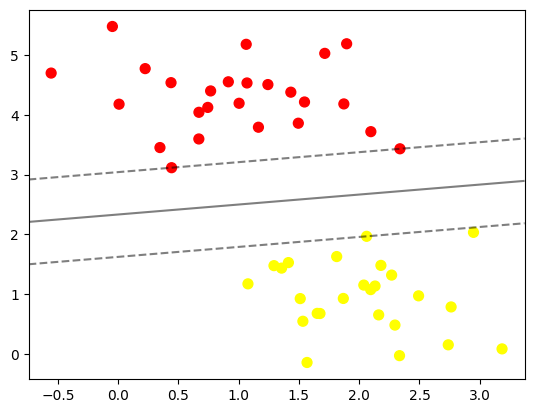

In [79]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

*Penjelasan :*
1. **plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')**: Membuat scatter plot dari data X dan y.
  *   **X[:, 0]**: Mengambil semua baris (:) dan kolom pertama (0) dari data X, yaitu koordinat x dari setiap titik data.
  *   **X[:, 1]**: Mengambil semua baris (:) dan kolom kedua (1) dari data X, yaitu koordinat y dari setiap titik data.
  *   **c=y**: Memberi warna pada titik data berdasarkan label kelas (y).
  *   **s=50**: Menentukan ukuran marker (titik data) pada plot.
  *   **cmap='autumn'**: Menentukan colormap yang digunakan untuk mewarnai titik data.
2. **plot_svc_decision_function(model)**: Memanggil fungsi plot_svc_decision_function untuk menampilkan decision boundary dan margin dari model SVC. Fungsi ini mengambil objek model sebagai argumen.
  *   Fungsi plot_svc_decision_function didefinisikan di kode sebelumnya dan digunakan untuk memvisualisasikan decision boundary dan margin dari model SVC.

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [80]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

*Penjelasan :*
1. **model.support_vectors_**: Ini adalah atribut dari objek model (model SVC). Atribut ini berisi datapoints yang menjadi support vectors. Support vectors adalah datapoints yang terletak pada margin atau di dalam margin. Datapoints ini berperan penting dalam menentukan decision boundary.

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

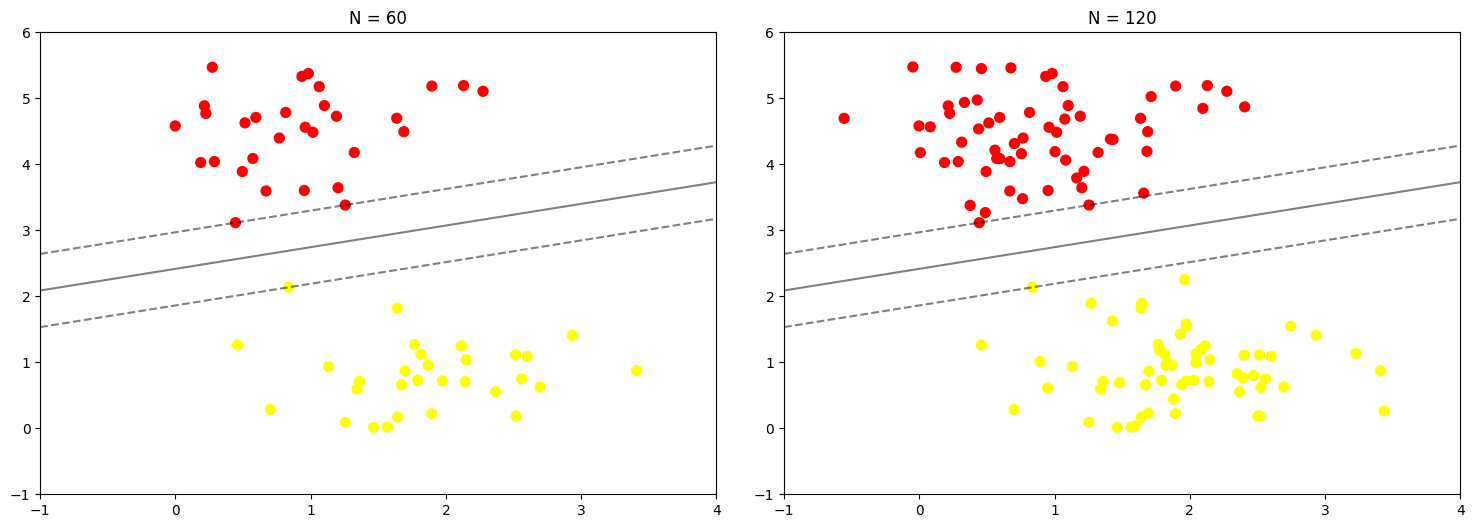

In [81]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

*Penjelasan :*
1. **def plot_svm(N=10, ax=None):**: Mendefinisikan fungsi dengan nama plot_svm.
  *   **N**: Jumlah sampel data yang akan digunakan (opsional). Defaultnya adalah 10.
  *   **ax**: Objek matplotlib.axes.Axes yang digunakan untuk memplot (opsional). Jika tidak diberikan, akan digunakan axes aktif.
2. **X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)**: Menggunakan fungsi make_blobs dari library sklearn.datasets untuk membuat data acak berkelompok.
  *   **n_samples**: Jumlah sampel data keseluruhan (200).
  *   **centers**: Jumlah kelompok data (2).
  *   **random_state**: Seed untuk menghasilkan data acak yang bisa direproduksi (0).
  *   **cluster_std**: Standar deviasi untuk distribusi data dalam kelompok (0.60).
3. **X = X[:N]**: Memotong baris data X agar hanya berisi N sampel pertama.
4. **y = y[:N]**: Memotong label kelas y agar hanya berisi label untuk N sampel pertama.
5. **model = SVC(kernel='linear', C=1E10)**: Membuat objek model SVM dengan class SVC dari library sklearn.svm.
  *   **kernel='linear'**: Menggunakan kernel linear untuk klasifikasi.
  *   **C=1E10**: Hyperparameter regularisasi (C) dengan nilai sangat besar untuk memprioritaskan pemisahan kelas yang ketat.
6. **model.fit(X, y)**: Melatih model SVM dengan data X dan label y.
7. **ax = ax or plt.subplots(1, 1)[0]**
: Memeriksa apakah ax diberikan. Jika tidak, maka buat axes baru menggunakan plt.subplots(1, 1)[0].
8. **ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')**: Memplot data X sebagai titik-titik pada axes ax.
  *   **X[:, 0]**: Koordinat x dari data.
  *   **X[:, 1]**: Koordinat y dari data.
  *   **c=y**: Menggunakan label kelas y untuk menentukan warna titik.
  *   **s=50**: Ukuran titik.
  *   **cmap='autumn'**: Menggunakan skema warna 'autumn' untuk mewarnai titik berdasarkan kelas.
9. **ax.set_xlim(-1, 4)**: Menyetel batas-batas horizontal (x-axis) dari axes ax menjadi -1 sampai 4.
10. **ax.set_ylim(-1, 6)**: Menyetel batas-batas vertikal (y-axis) dari axes ax menjadi -1 sampai 6.
11. **plot_svc_decision_function(model, ax)**
: Memanggil fungsi plot_svc_decision_function yang dijelaskan sebelumnya untuk memplot batas keputusan dan support vectors dari model model pada axes ax.
12. **fig, ax = plt.subplots(1, 2, figsize=(16, 6))**: Membuat figure fig baru dengan 1 baris dan 2 kolom, serta ukuran keseluruhan (16, 6).
  *   **ax**: Array berisi objek axes untuk setiap kolom.
13. **fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)**: Menyesuaikan layout figure:
  *   **left=0.0625**: Jarak pinggir kiri plot ke batas figure.
  *   **right=0.95**: Jarak pinggir kanan plot ke batas figure.
  *   **wspace=0.1**: Jarak antar kolom plot.
14. **for axi, N in zip(ax, [60, 120])**: Melakukan iterasi melalui setiap pasangan elemen dari ax dan [60, 120].
  *   **axi**: Objek axes untuk setiap kolom.
  *   **N**: Nilai yang digunakan untuk menentukan jumlah sampel data.
15. **plot_svm(N, axi)**: Memanggil fungsi plot_svm dengan nilai N yang diambil dari iterasi dan menggunakan objek axes axi untuk memplot.
16. **axi.set_title('N = {0}'.format(N))**: Menambahkan judul pada axes axi dengan format "N = {N}".
  *   {N} akan diganti dengan nilai N yang sedang diiterasi.

**Data Tidak Terpisah Secara Linier**

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

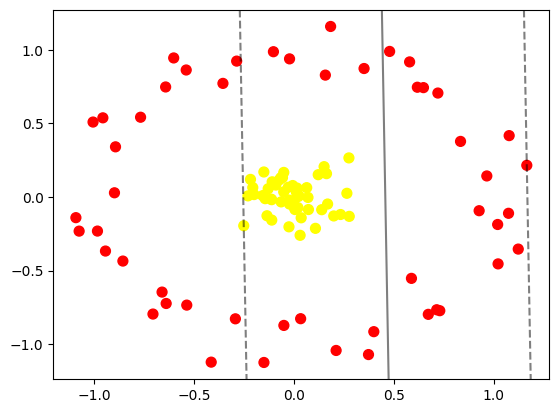

In [82]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

*Penjelasan :*
1. **from sklearn.datasets import make_circles**: Mengimpor fungsi make_circles dari modul sklearn.datasets. Fungsi ini digunakan untuk membuat dataset sintetis berbentuk lingkaran.
2. **X, y = make_circles(100, factor=.1, noise=.1)**: Memanggil fungsi make_circles untuk membuat dataset.
  *   **100**: Jumlah sampel data.
  *   **factor=.1**: Faktor skala antara lingkaran dalam dan lingkaran luar.
  *   **noise=.1**: Tingkat noise yang ditambahkan ke data.
  *   Output fungsi make_circles berupa dua variabel:
    *   **X**: berisi data fitur (koordinat x dan y dari setiap titik data).
    *   **y**: berisi label kelas untuk setiap titik data (0 atau 1).
3. **clf = SVC(kernel='linear').fit(X, y)**: Membuat objek clf dari kelas SVC dengan kernel linear dan melatih model tersebut dengan data X dan y.
  *   **kernel='linear'**: Menentukan kernel linear untuk model SVC.
  *   **fit(X, y)**: Melatih model SVC dengan data X (fitur) dan y (label).
4. **plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')**: Membuat scatter plot dari data X dan y.
  *   **X[:, 0]**: Mengambil semua baris (:) dan kolom pertama (0) dari data X, yaitu koordinat x dari setiap titik data.
  *   **X[:, 1]**: Mengambil semua baris (:) dan kolom kedua (1) dari data X, yaitu koordinat y dari setiap titik data.
  *   **c=y**: Memberi warna pada titik data berdasarkan label kelas (y).
  *   **s=50**: Menentukan ukuran marker (titik data) pada plot.
  *   **cmap='autumn'**: Menentukan colormap yang digunakan untuk mewarnai titik data.
5. **plot_svc_decision_function(clf, plot_support=False)**: Memanggil fungsi plot_svc_decision_function untuk menampilkan decision boundary dari model SVC.
  *   **plot_support=False**: Menonaktifkan plotting support vectors.

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [83]:
r = np.exp(-(X ** 2).sum(1))

*Penjelasan :*
1. **r = np.exp(-(X ** 2).sum(1))**: Menghitung nilai r yang merupakan hasil dari fungsi eksponensial negatif dari jumlah kuadrat nilai-nilai dalam setiap baris data X.
  *   X ** 2: Mengkuadratkan setiap elemen dalam array X.
  *   (X ** 2).sum(1): Menjumlahkan nilai-nilai pada setiap baris (axis=1) dari array X yang telah dikuadratkan.
  *   np.exp(-(X ** 2).sum(1)): Menghitung eksponensial negatif dari hasil penjumlahan pada langkah sebelumnya.

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.13836714, -0.08602151],
       [-0.21815918,  0.11982456],
       [ 0.00295978, -0.0746237 ],
       [-0.05105925, -0.8719206 ],
       [-0.07366355,  0.11686595],
       [ 0.01216102,  0.03074697],
       [-0.85671573, -0.43482887],
       [-0.11228233, -0.01784995],
       [-0.00695618,  0.07810258],
       [ 0.57818049,  0.9177143 ],
       [-0.60240709,  0.94456914],
       [-0.06475168, -0.03296684],
       [-0.05183482,  0.03469731],
       [ 0.92612225, -0.09289712],
       [ 0.06952626, -0.00267545],
       [ 0.58739875, -0.55232664],
       [-0.02472944, -0.02079149],
       [ 0.10696221, -0.21265493],
       [-0.20673411,  0.06444059],
       [-0.00162986, -0.05509043],
       [ 0.01928028, -0.07193887],
       [-0.25187479, -0.19484027],
       [-0.09125407,  0.08126904],
       [-0.13553109, -0.12715995],
       [-0.15125917,  0.17013006],
       [-0.10334902,  0.9869146 ],
       [-0.20037724,  0.01671202],
       [-0.02900402,  0.06632434],
       [ 0.15648444,  0.82802591],
       [ 0.16776129, -0.04747947],
       [ 0.39904089, -0.91438514],
       [-0.23082226,  0.00794031],
       [ 0.47815965,  0.98886064],
       [ 0.21040741, -1.04200624],
       [ 1.12183654, -0.35346285],
       [ 1.01881619, -0.18645586],
       [-0.53702825, -0.73399484],
       [ 0.06316704,  0.0636236 ],
       [-0.41475648, -1.12132814],
       [ 0.15021829,  0.20623516],
       [ 0.03019111, -0.25992058],
       [-0.8988668 ,  0.02886369],
       [ 0.61689278,  0.74566904],
       [-0.06588967,  0.13144348],
       [-0.95694649,  0.53787146],
       [-0.53981632,  0.86278788],
       [ 0.00470227, -0.08494941],
       [-0.64009831, -0.72291434],
       [-0.64279952,  0.74745602],
       [-0.28727983,  0.9231632 ],
       [-0.05802694,  0.13151214],
       [-0.11171875, -0.15650684],
       [-0.15081408, -1.12358409],
       [-0.11496094, -0.01425503],
       [ 0.37243493, -1.06983385],
       [ 0.27442961,  0.26572342],
       [-0.29371784, -0.82705669],
       [-0.05156129,  0.1672303 ],
       [-0.76819746,  0.54196103],
       [ 0.01501648,  0.06054391],
       [ 0.26423759,  0.02541031],
       [-0.02268626, -0.04766725],
       [ 1.07637991,  0.4171055 ],
       [-0.1445891 , -0.01109605],
       [ 0.02310508,  0.01073884],
       [-0.15677322,  0.00965611],
       [ 0.03285359, -0.8262591 ],
       [ 0.02186546,  0.00403295],
       [-0.12966168,  0.05637089],
       [ 0.27609262, -0.13123518],
       [-0.35603644,  0.77182902],
       [-0.70620257, -0.79468657],
       [ 0.16223566,  0.15876347],
       [ 0.03549961, -0.14103063],
       [-0.10966619,  0.10330782],
       [ 1.02088719, -0.45402114],
       [ 0.72915095, -0.77189502],
       [-0.02266264,  0.93835468],
       [ 0.35022828,  0.87281737],
       [ 0.67169728, -0.79668461],
       [ 1.16464577,  0.21553067],
       [ 0.12083143,  0.1516976 ],
       [ 0.64744129,  0.74299415],
       [ 0.71375906, -0.76542592],
       [ 1.07321344, -0.11046732],
       [ 0.83300704,  0.37774803],
       [ 0.19856393, -0.12844966],
       [-0.89365384,  0.34094823],
       [-1.00605132,  0.50928121],
       [-0.98397052, -0.23113018],
       [ 0.18284719,  1.15831349],
       [-0.02560251, -0.20232817],
       [ 0.0718765 , -0.08492566],
       [ 0.23233299, -0.1186097 ],
       [ 0.71965904,  0.70624122],
       [-0.94382212, -0.36679891],
       [-1.09190174, -0.14010329],
       [-0.66065025, -0.64556968],
       [ 0.96453051,  0.14316457],
       [-1.07567807, -0.23155381]]), y=array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]))>

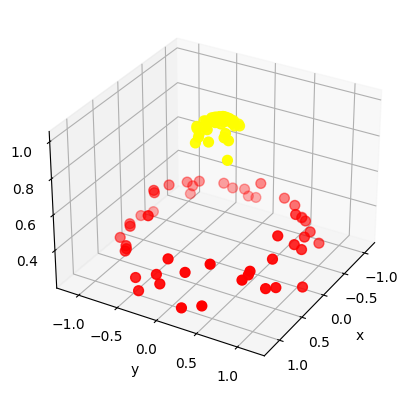

In [84]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180), # Fix typo azip to azim
         X=fixed(X), y=fixed(y))

*Penjelasan :*
1. **from mpl_toolkits import mplot3d**: Mengimpor modul mplot3d dari library mpl_toolkits. Modul ini menyediakan fungsi-fungsi untuk membuat plot 3D.
2. **from ipywidgets import interact, interactive, fixed**: Mengimpor fungsi-fungsi interact, interactive, dan fixed dari library ipywidgets. Fungsi-fungsi ini digunakan untuk membuat elemen interaktif dalam Jupyter Notebook.
3. **def plot_3D(elev=30, azim=30, X=X, y=y):**: Mendefinisikan fungsi plot_3D yang akan digunakan untuk membuat plot 3D.
  *   **elev**: Sudut elevasi pandangan (default 30 derajat).
  *   **azim**: Sudut azimuth pandangan (default 30 derajat).
  *   **X**: Data input (matrix).
  *   **y**: Label kelas (vektor).
4. **ax = plt.subplot(projection='3d')**: Membuat subplot 3D menggunakan plt.subplot dengan proyeksi 3d.
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
5. **ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')**: Memplot data 3D sebagai titik-titik pada axes ax.
  *   **X[:, 0]**: Koordinat x dari data.
  *   **X[:, 1]**: Koordinat y dari data.
  *   **r**: Koordinat z dari data (asumsikan r sudah didefinisikan sebelumnya).
  *   **c=y**: Menggunakan label kelas y untuk menentukan warna titik.
  *   **s=50**: Ukuran titik.
  *   **cmap='autumn'**: Menggunakan skema warna 'autumn' untuk mewarnai titik berdasarkan kelas.
6. **ax.view_init(elev=elev, azim=azim)**: Menentukan sudut pandang plot dengan elev dan azim.
7. **ax.set_xlabel('x')**: Menambahkan label 'x' pada sumbu x.
8. **ax.set_ylabel('y')**: Menambahkan label 'y' pada sumbu y.
9. **ax.set_zlabel('r')**: Menambahkan label 'r' pada sumbu z.
10. **interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180), X=fixed(X), y=fixed(y))**: Membuat elemen interaktif menggunakan interact.
  *   **plot_3D**: Fungsi yang akan dipanggil saat parameter diubah.
  *   **elev=[-90, 45, 30, 20 , 10]**: Pilihan nilai untuk elev.
  *   **azip=(-180, 180)**: Pilihan nilai untuk azim.
  *   **X=fixed(X)**: Menjaga X tetap konstan.
  *   **y=fixed(y)**: Menjaga y tetap konstan.

walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [85]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

*Penjelasan :*
1. **clf = SVC(kernel='rbf', C=1E6)**: Membuat objek clf dari kelas SVC.
  *   **kernel='rbf'**: Menentukan kernel Radial Basis Function (RBF) untuk model SVC. Kernel RBF digunakan untuk data yang tidak terpisah secara linear.
  *   **C=1E6**: Nilai parameter penalti. Nilai C yang besar (seperti 1E6) akan membuat model lebih sensitif terhadap error dan dapat menyebabkan overfitting.
2. **clf.fit(X, y)**: Melatih model SVC.
  *   **X**: Data fitur.
  *   **y**: Label kelas.

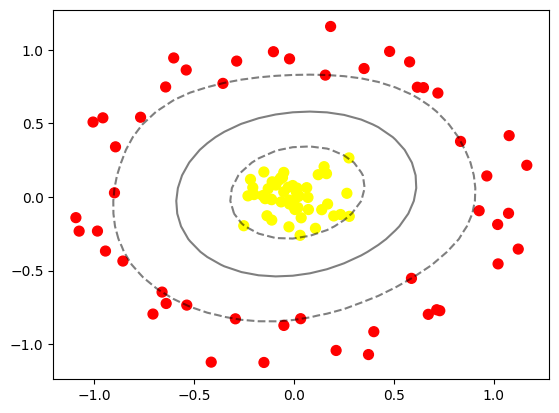

In [86]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

*Penjelasan :*
1. **plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')**: Membuat scatter plot dari data.
  *   **X[:, 0]**: Mengambil nilai kolom pertama dari X (koordinat x).
  *   **X[:, 1]**: Mengambil nilai kolom kedua dari X (koordinat y).
  *   **c=y**: Memberi warna titik berdasarkan label kelas (y).
  *   **s=50**: Ukuran marker.
  *   **cmap='autumn'**: Colormap.
2. **plot_svc_decision_function(clf)**: Memvisualisasikan decision boundary dan margin dari model SVC (clf).
3. **plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')**: Menampilkan support vectors.
  *   **clf.support_vectors_**: Mengambil support vectors dari model clf.
  *   **s=300**: Ukuran marker untuk support vectors.
  *   **lw=1**: Lebar garis marker.
  *   **facecolors='none'**: Marker tanpa isi (hanya garis tepi).


**Data Overlap**


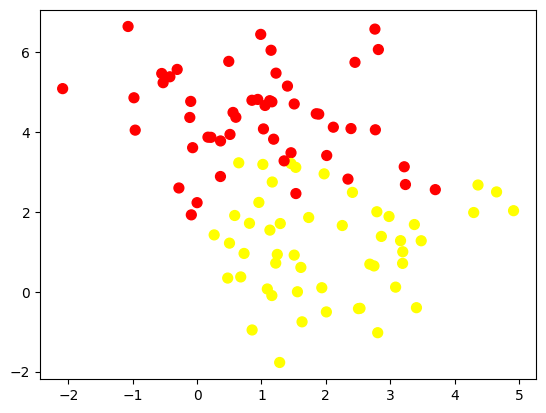

In [87]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

*Penjelasan :*
1. **X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)**: Membuat dataset menggunakan fungsi make_blobs.
  *   **n_samples=100**: Jumlah datapoints.
  *   **centers=2**: Jumlah cluster.
  *   **random_state=0**: Mengatur seed untuk generator angka acak agar hasil tetap sama setiap kali dijalankan.
  *   **cluster_std=1.2**: Standar deviasi dari cluster. Nilai 1.2 menunju
  *   Fungsi ini mengembalikan dua nilai:
    *   **X**: Data fitur (koordinat x dan y dari setiap titik data).
    *   **y**: Label kelas untuk setiap titik data (0 atau 1).
2. **plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')**: Membuat scatter plot dari data X dan y.
  *   **X[:, 0]**: Mengambil semua baris (:) dan kolom pertama (0) dari data X, yaitu koordinat x dari setiap titik data.
  *   **X[:, 1]**: Mengambil semua baris (:) dan kolom kedua (1) dari data X, yaitu koordinat y dari setiap titik data.
  *   **c=y**: Memberi warna pada titik data berdasarkan label kelas (y).
  *   **s=50**: Menentukan ukuran marker (titik data) pada plot.
  *   **cmap='autumn'**: Menentukan colormap yang digunakan untuk mewarnai titik data.

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

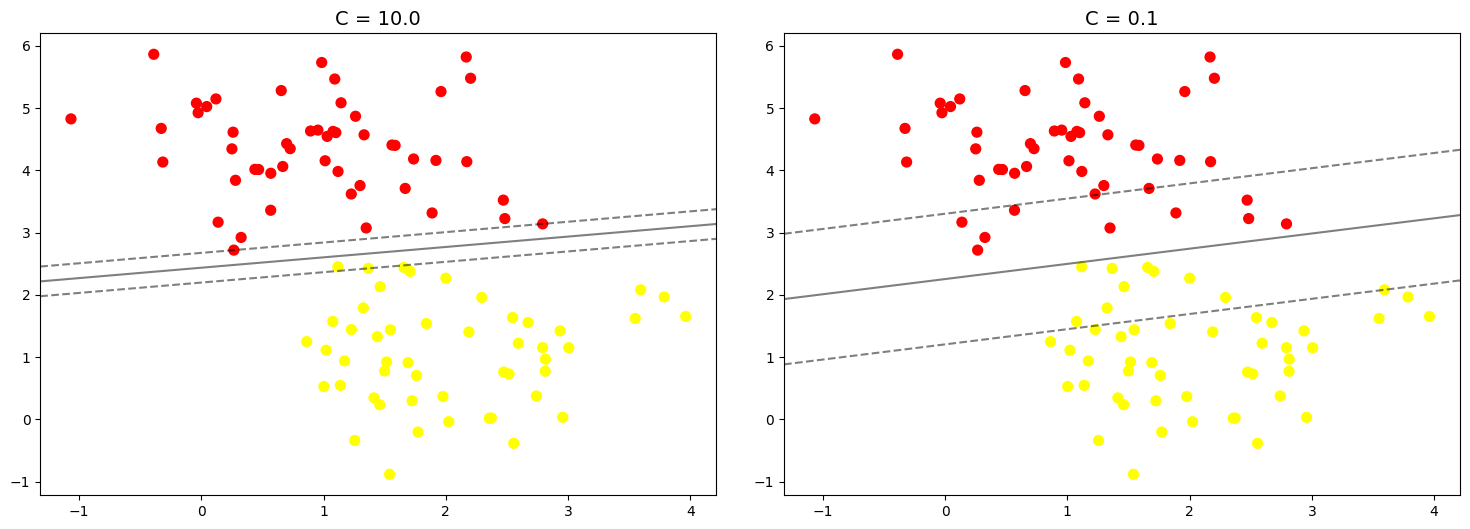

In [88]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

*Penjelasan :*
1. **X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)**: Membuat data acak berkelompok menggunakan fungsi make_blobs dari library sklearn.datasets.
  *   **n_samples**: Jumlah sampel data keseluruhan (100).
  *   **centers**: Jumlah kelompok data (2).
  *   **random_state**: Seed untuk menghasilkan data acak yang bisa direproduksi (0).
  *   **cluster_std**: Standar deviasi untuk distribusi data dalam kelompok (0.8).
2. **fig, ax = plt.subplots(1, 2, figsize=(16, 6))**: Membuat figure fig baru dengan 1 baris dan 2 kolom, serta ukuran keseluruhan (16, 6).
  *   **ax**: Array berisi objek axes untuk setiap kolom.
3. **fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)**: Menyesuaikan layout figure.
  *   **left=0.0625**: Jarak pinggir kiri plot ke batas figure.
  *   **right=0.95**: Jarak pinggir kanan plot ke batas figure.
  *   **wspace=0.1**: Jarak antar kolom plot.
4. **for axi, C in zip(ax, [10.0, 0.1])**: Melakukan iterasi melalui setiap pasangan elemen dari ax dan [10.0, 0.1].
  *   **axi**: Objek axes untuk setiap kolom.
  *   **C**: Nilai hyperparameter regularisasi.
5. **model = SVC(kernel='linear', C=C).fit(X, y)**: Membuat objek model SVM dengan class SVC dari library sklearn.svm.
  *   **kernel='linear'**: Menggunakan kernel linear untuk klasifikasi.
  *   **C=C**: Menggunakan nilai C yang diambil dari iterasi.
  *   **fit(X, y)**: Melatih model SVM dengan data X dan label y.
6. **axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')**: Memplot data X sebagai titik-titik pada axes axi.
  *   **X[:, 0]**: Koordinat x dari data.
  *   **X[:, 1]**: Koordinat y dari data.
  *   **c=y**: Menggunakan label kelas y untuk menentukan warna titik.
  *   **s=50**: Ukuran titik.
  *   **cmap='autumn'**: Menggunakan skema warna 'autumn' untuk mewarnai titik berdasarkan kelas.
7. **plot_svc_decision_function(model, axi)**: Memanggil fungsi plot_svc_decision_function yang dijelaskan sebelumnya untuk memplot batas keputusan dan support vectors dari model model pada axes axi.
8. **axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');**: Memplot support vectors sebagai titik-titik pada axes axi.
  *   **model.support_vectors_[:, 0]**: Koordinat x dari support vectors.
  *   **model.support_vectors_[:, 1]**: Koordinat y dari support vectors.
  *   **s=300**: Ukuran titik-titik.
  *   **lw=1**: Lebar garis tepi titik-titik.
  *   **facecolors='none'**: Mengisi titik-titik dengan warna transparan.
9. **axi.set_title('C = {0:.1f}'.format(C), size=14)**: Menambahkan judul pada axes axi dengan format "C = {C:.1f}".
  *   **{C:.1f}** akan diganti dengan nilai C yang sedang diiterasi, dibulatkan hingga satu desimal.

Perlu diperhatikan bahwa nila optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa)

# Praktikum 2
Klasifikasi SVM Pada Data Citra

dataset yang digunakan adalah Labeled Faces in the Wild dataset (sebuah dataset yang berisi ribuan wajah publik figur).


Link dataset: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset

In [89]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


*Penjelasan :*
1. **from sklearn.datasets import fetch_lfw_people**: Mengimpor fungsi fetch_lfw_people dari modul sklearn.datasets. Fungsi ini digunakan untuk mengunduh dataset LFW.
2. **faces = fetch_lfw_people(min_faces_per_person=60)**: Mengunduh dataset LFW dan menyimpannya dalam variabel faces.
  *   **min_faces_per_person=60**: Hanya menyertakan orang yang memiliki minimal 60 gambar dalam dataset.
3. **print(faces.target_names)**: Menampilkan nama-nama orang (target) dalam dataset.
4. **print(len(faces.target_names))**: Menampilkan jumlah orang (target) dalam dataset.
5. **print(faces.images.shape)**: Menampilkan dimensi gambar dalam dataset (jumlah gambar, tinggi, lebar).

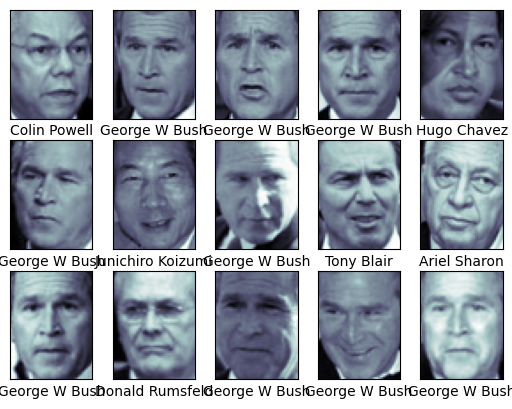

In [90]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

*Penjelasan :*
1. **fig, ax = plt.subplots(3, 5)**: Membuat figure dan grid axes untuk menampilkan gambar.
  *   **3**: Jumlah baris dalam grid.
  *   **5**: Jumlah kolom dalam grid.
  *   Fungsi ini mengembalikan dua objek:
    *   **fig**: Objek figure.
    *   **ax**: Array objek axes.
2. **for i, axi in enumerate(ax.flat)**: Melakukan iterasi pada setiap axes dalam grid.
  *   **ax.flat**: Mengembalikan iterator untuk semua axes dalam grid dalam bentuk flattened (1 dimensi).
  *   **enumerate**: Fungsi untuk mendapatkan index (i) dan nilai (axi) dari setiap iterasi.
3. **axi.imshow(faces.images[i], cmap='bone')**: Menampilkan gambar pada axes axi.
  *   **faces.images[i]**: Mengambil gambar ke-i dari dataset faces.
  *   **cmap='bone'**: Menggunakan colormap 'bone' (grayscale).
4. **axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])**: Mengatur properti axes axi.
  *   **xticks=[]**: Menonaktifkan ticks pada sumbu x.
  *   **yticks=[]**: Menonaktifkan ticks pada sumbu y.
  *   **xlabel=faces.target_names[faces.target[i]]**: Menambahkan label pada sumbu x dengan nama orang yang sesuai dengan gambar.



In [91]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

*Penjelasan :*
1. **from sklearn.svm import SVC**: Mengimpor kelas SVC dari modul sklearn.svm.
2. **from sklearn.decomposition import PCA as RandomizedPCA**: Mengimpor kelas PCA dari modul sklearn.decomposition dan menamainya sebagai RandomizedPCA.
3. **from sklearn.pipeline import make_pipeline**: Mengimpor fungsi make_pipeline dari modul sklearn.pipeline.
4. **pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)**: Membuat objek pca dari kelas RandomizedPCA.
  *   **n_components=150**: Jumlah komponen utama yang akan diekstrak.
  *   **whiten=True**: Melakukan whitening untuk menstandarkan data.
  *   **random_state=42**: Mengatur seed untuk generator angka acak agar hasil konsisten.
5. **svc = SVC(kernel='rbf', class_weight='balanced')**: Membuat objek svc dari kelas SVC.
  *   **kernel='rbf'**: Menggunakan kernel RBF.
  *   **class_weight='balanced'**: Menyeimbangkan bobot kelas secara otomatis berdasarkan frekuensi kemunculan setiap kelas dalam data training.
6. **model = make_pipeline(pca, svc)**: Membuat pipeline dengan menggabungkan objek pca dan svc.

In [92]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

*Penjelasan :*
1. **from sklearn.model_selection import train_test_split**: Mengimpor fungsi train_test_split dari modul sklearn.model_selection. Fungsi ini digunakan untuk membagi dataset menjadi subset training dan testing.
2. **Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)**: Membagi data faces.data dan label faces.target menjadi data training (Xtrain, ytrain) dan data testing (Xtest, ytest).
  *   **random_state=42**: Mengontrol pengacakan data. Menggunakan nilai yang sama akan menghasilkan pembagian data yang sama setiap kali kode dijalankan.

In [93]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 46s, sys: 27.2 s, total: 2min 13s
Wall time: 1min 27s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


*Penjelasan :*
1. from sklearn.model_selection import GridSearchCV: Mengimpor kelas GridSearchCV dari modul sklearn.model_selection. Kelas ini digunakan untuk mencari kombinasi hyperparameter terbaik untuk model machine learning.
2. **param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}**: Mendefinisikan grid parameter yang akan dicari.
  *   **svc__C**: Parameter C pada model SVC.
  *   **svc__gamma**: Parameter gamma pada model SVC.
3. **grid = GridSearchCV(model, param_grid)**: Membuat objek grid dari kelas GridSearchCV.
  *   **model**: Model pipeline yang telah dibuat sebelumnya.
  *   **param_gri**d: Grid parameter yang telah didefinisikan.
4. **%time grid.fit(Xtrain, ytrain)**: Melatih model grid dengan data training (Xtrain, ytrain) dan mengukur waktu eksekusi.
  *   **%time**: Magic command di Google Colab/Jupyter Notebook untuk mengukur waktu eksekusi kode.
5. **print(grid.best_params_)**: Menampilkan kombinasi parameter terbaik yang ditemukan oleh GridSearchCV.
6. **print(grid.best_score_)**: Menampilkan skor terbaik yang dicapai oleh model dengan parameter terbaik.

prediksi label untuk data testing

In [94]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

*Penjelasan :*
1. **model = grid.best_estimator_**: Mengambil model terbaik dari objek grid (hasil GridSearchCV) dan menyimpannya dalam variabel model. best_estimator_ adalah atribut dari GridSearchCV yang berisi model dengan parameter terbaik.
2. **yfit = model.predict(Xtest**): Melakukan prediksi pada data testing (Xtest) menggunakan model terbaik (model) dan menyimpan hasil prediksi dalam variabel yfit.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

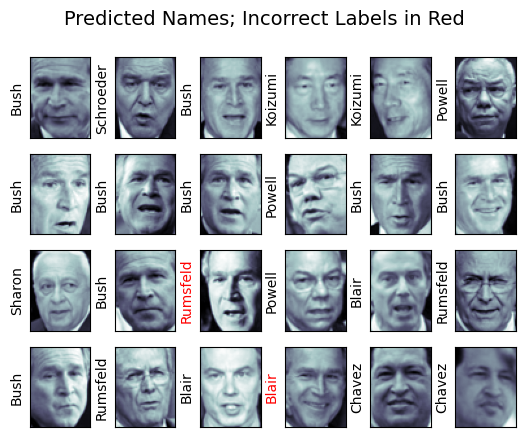

In [95]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

*Penjelasan :*
1. **fig, ax = plt.subplots(4, 6)**: Membuat figure dan axes untuk menampilkan gambar dalam grid 4x6.
2. **for i, axi in enumerate(ax.flat)**: Melakukan iterasi untuk setiap axes dalam grid.
  *   **enumerate**: Mendapatkan index (i) dan objek axes (axi).
3. **axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')**: Menampilkan gambar pada axes axi.
  *   **Xtest[i]**: Mengambil data gambar ke-i dari data testing.
  *   **reshape(62, 47)**: Mengubah dimensi data gambar menjadi 62x47.
  *   **cmap='bone'**: Menggunakan colormap 'bone'.
4. **axi.set(xticks=[], yticks=[])**: Menonaktifkan ticks pada sumbu x dan y.
5. **axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')**: Menambahkan label pada sumbu y dengan nama orang yang diprediksi.
  *   **faces.target_names[yfit[i]]**: Mengambil nama orang dari hasil prediksi yfit.
  *   **split()[-1]**: Mengambil kata terakhir dari nama orang.
  *   **color='black' if yfit[i] == ytest[i] else 'red'**: Mengatur warna label menjadi hitam jika prediksi benar, merah jika salah.
6. **fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)**: Menambahkan judul pada figure.

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [96]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



*Penjelasan :*
1. **from sklearn.metrics import classification_report**: Mengimpor fungsi classification_report dari modul sklearn.metrics. Fungsi ini digunakan untuk membuat laporan klasifikasi yang berisi metrik seperti precision, recall, dan f1-score.
2. **print(classification_report(ytest, yfit, target_names=faces.target_names))**: Memanggil fungsi classification_report dengan argumen:
  *   **ytest**: Label kelas sebenarnya dari data testing.
  *   **yfit**: Label kelas hasil prediksi dari model.
  *   **target_names=faces.target_names**: Nama-nama kelas (target) untuk ditampilkan dalam laporan.


Text(113.92222222222219, 0.5, 'predicted label')

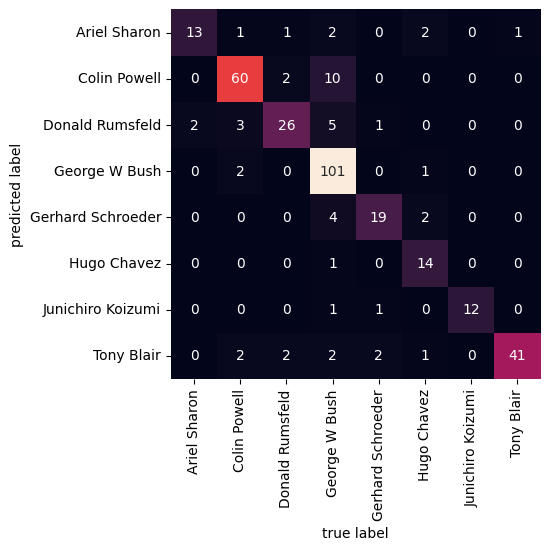

In [97]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

*Penjelasan :*
1. **from sklearn.metrics import confusion_matrix**: Mengimpor fungsi confusion_matrix dari modul sklearn.metrics. Fungsi ini digunakan untuk menghitung confusion matrix yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.
2. **mat = confusion_matrix(ytest, yfit)**: Memanggil fungsi confusion_matrix dengan argumen ytest (label sebenarnya) dan yfit (label prediksi) dan menyimpan hasilnya dalam variabel mat.
3. **sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)**: Memanggil fungsi heatmap dari library seaborn untuk membuat visualisasi confusion matrix.
  *   **mat.T**: Menggunakan transpose dari matriks mat.
  *   **square=True**: Membuat heatmap berbentuk persegi.
  *   **annot=True**: Menampilkan nilai di setiap sel heatmap.
  *   **fmt='d'**: Format angka sebagai bilangan bulat.
  *   **cbar=False**: Menonaktifkan colorbar.
  *   **xticklabels=faces.target_names**: Menggunakan nama target sebagai label untuk sumbu x.
  *   **yticklabels=faces.target_names**: Menggunakan nama target sebagai label untuk sumbu y.
4. **plt.xlabel('true label')**: Menambahkan label 'true label' pada sumbu x.
5. **plt.ylabel('predicted label')**: Menambahkan label 'predicted label' pada sumbu y.

# Praktikum 3
Klasifikasi Naive Bayes dengan Data Dummy

Pada percobaan ini kita akan menggunakan data dummy (sintentis) untuk membuat sebuah model Naive Bayes. Untuk membuat data dummy, kita dapat menggunakan fungsi make_classification dari library scikit-learn. Selanjutnya, kita akan membuat model Multinomial Naive Bayes dengan menggunakan MultinomialNB dan model Gaussian Naive Bayes menggunakan GaussianNB.

**Mendefiniskan Data Dummy**

In [98]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[108  92]
 [ 91 108]
 [ 74  90]
 [128 113]
 [ 49  65]
 [ 62  83]
 [ 73  16]
 [164 236]
 [170   3]
 [102 101]
 [ 87  87]
 [119  34]
 [118  81]
 [120  33]
 [ 80 168]
 [114  62]
 [ 76 265]
 [197   9]
 [ 79 120]
 [149  54]
 [ 84 115]
 [ 61 137]
 [ 71 127]
 [ 77 107]
 [135 168]
 [240 254]
 [150  44]
 [185  80]
 [118 126]
 [ 84  31]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


*Penjelasan :*
1. **import numpy as np**: Mengimpor library NumPy dan memberikan alias np. NumPy digunakan untuk operasi numerik dan array di Python.
2. **from sklearn.datasets import make_classification**: Mengimpor fungsi make_classification dari modul sklearn.datasets Scikit-learn. Fungsi ini digunakan untuk membuat dataset sintetis untuk masalah klasifikasi.
3. **X, y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)**: Memanggil fungsi make_classification untuk membuat dataset.
  *   **n_samples=30**: Jumlah sampel data, yaitu 30.
  *   **n_features=2**: Jumlah fitur atau atribut, yaitu 2.
  *   **n_classes=2**: Jumlah kelas atau label target, yaitu 2.
  *   **n_informative=2**: Jumlah fitur informatif, yaitu 2. Fitur informatif adalah fitur yang berkontribusi pada pemisahan kelas.
  *   **n_redundant=0**: Jumlah fitur redundan, yaitu 0. Fitur redundan adalah fitur yang merupakan kombinasi linear dari fitur informatif.
  *   **n_repeated=0**: Jumlah fitur yang diulang, yaitu 0. Fitur yang diulang adalah duplikat dari fitur informatif atau redundan.
  *   **shuffle=False**: Tidak mengacak urutan sampel.
  *   Output fungsi **make_classification** berupa dua variabel:
    *   **X**: berisi data fitur.
    *   **y**: berisi label kelas untuk setiap sampel data (0 atau 1, karena ada dua kelas).
4. **X = np.absolute(X)**: Mengubah semua nilai dalam array X menjadi nilai absolut (non-negatif).
5. X = np.round(X, 2) * 100: Membulatkan setiap nilai dalam array X menjadi 2 angka desimal dan mengalikannya dengan 100.
6. **X = X.astype(int)**: Mengubah tipe data array X menjadi integer (bilangan bulat).
7. **print(X)**: Menampilkan array X yang telah dimodifikasi ke konsol.
8. **print(y)**: Menampilkan array y (label kelas) ke konsol.

Parameter yang digunakan pada fungsi make_classification adalah,
*   n_samples: jumlah sampel yang diinginkan
*   n_features: jumlah fitur yang digunakan
*   n_classes: jumlah kelas
*   n_informative: jumlah fitur yang memiliki korelasi dengan kelas
*   n_redundant: jumlah fitur yang tidak memiliki korelasi dengan kelas
*   n_repeated: jumlah fitur yang diulang

**(Opsional) Membuat Data Frame**

Agar data lebih mudah untuk dibaca, maka kita akan membuat DataFrame dengan menggunakan library Pandas berdasarkan data dummy yang telah dibuat sebelumnya

In [99]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,108,92,0
1,91,108,0
2,74,90,0
3,128,113,0
4,49,65,0


*Penjelasan :*
1. **import pandas as pd**: Mengimpor library Pandas dan memberikan alias pd. Pandas digunakan untuk manipulasi dan analisis data di Python.
2. **y_new = y.reshape(len(y), 1)**: Mengubah bentuk array y (label kelas) menjadi array 2 dimensi dengan 1 kolom. len(y) memberikan jumlah baris, dan 1 menunjukkan jumlah kolom.
3. **data = np.concatenate((X, y_new), axis=1)**: Menggabungkan array X (fitur) dan y_new (label kelas) secara horizontal (axis=1) menjadi satu array data.
4. **nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']**: Membuat list nama_kolom yang berisi nama-nama kolom untuk DataFrame.
5. **df = pd.DataFrame(data, columns=nama_kolom)**: Membuat DataFrame Pandas dari array data.
  *   **columns=nama_kolom**: Menggunakan list nama_kolom sebagai nama kolom DataFrame.
6. **df.head()**: Menampilkan 5 baris pertama dari DataFrame df untuk melihat struktur dan isi data.

Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [100]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,108,92,Kelas B
1,91,108,Kelas B
2,74,90,Kelas B
3,128,113,Kelas B
4,49,65,Kelas B


*Penjelasan :*
1. **labels = {1: 'Kelas A', 0: 'Kelas B'}**: Membuat dictionary labels yang memetakan nilai numerik ke label kategorikal.
  *   **1**: dipetakan ke 'Kelas A'.
  *   **0**: dipetakan ke 'Kelas B'.
2. **df_label = df.copy()**: Membuat salinan DataFrame df dan menyimpannya dalam variabel df_label. Ini dilakukan untuk menghindari modifikasi langsung pada DataFrame df yang asli.
3. **df_label['Label'] = df_label['Label'].map(labels)**: Mengubah nilai pada kolom 'Label' di DataFrame df_label.
  *   **map(labels)**: Menggunakan fungsi map dari Pandas untuk memetakan nilai numerik di kolom 'Label' ke label kategorikal yang sesuai berdasarkan dictionary labels.
4. **df_label.head()**: Menampilkan 5 baris pertama dari DataFrame df_label untuk melihat hasil pemetaan label.

**(Opsional) Visualisasi Data**

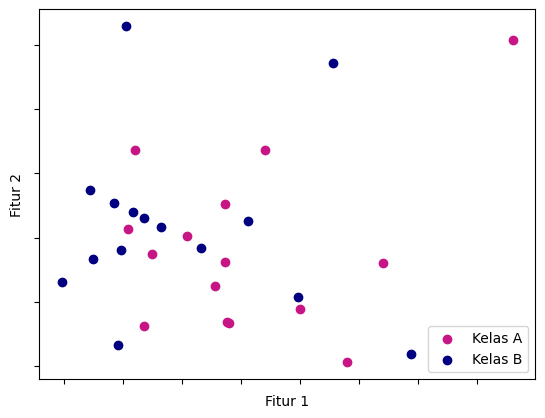

In [101]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

*Penjelasan :*
1. **import matplotlib.pyplot as plt**: Mengimpor modul matplotlib.pyplot sebagai plt untuk membuat plot.
2. **colors = { ... }**: Membuat dictionary colors yang berisi pemetaan nama kelas ke warna yang akan digunakan pada plot.
3. **gb = df_label.groupby(['Label'])**: Mengelompokkan data df_label berdasarkan kolom 'Label'.
  *   **gb** adalah objek groupby yang berisi kelompok data untuk setiap kelas.
4. **class_a = gb.get_group('Kelas A')**: Mengambil dataframe yang berisi data kelas A dari objek groupby gb.
  *   List item
5. **class_b = gb.get_group('Kelas B')**: Mengambil dataframe yang berisi data kelas B dari objek groupby gb.
  *   **class_b** berisi data dengan label 'Kelas B'.
6. **plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])**: Memplot data kelas A sebagai titik-titik pada plot.
  *   **x=class_a['Fitur 1']**: Menggunakan nilai kolom 'Fitur 1' sebagai koordinat x.
  *   **y=class_a['Fitur 2']**: Menggunakan nilai kolom 'Fitur 2' sebagai koordinat y.
  *   **c=colors['class_a']**: Menggunakan warna yang ditentukan untuk 'class_a' dari dictionary colors.
7. **plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])**: Memplot data kelas B sebagai titik-titik pada plot / tumpang tindih / overlay dengan data kelas A.
  *   **x=class_b['Fitur 1']**: Menggunakan nilai kolom 'Fitur 1' sebagai koordinat x.
  *   **y=class_b['Fitur 2']**: Menggunakan nilai kolom 'Fitur 2' sebagai koordinat y.
  *   **c=colors['class_b']**: Menggunakan warna yang ditentukan untuk 'class_b' dari dictionary colors.
8. **plt.xlabel('Fitur 1')**: Menambahkan label 'Fitur 1' pada sumbu x.
9. **plt.ylabel('Fitur 2')**: Menambahkan label 'Fitur 2' pada sumbu y.
10. **plt.legend(['Kelas A', 'Kelas B'])**:Menambahkan legend untuk membedakan plot kedua kelas.
11. **plt.gca().axes.xaxis.set_ticklabels([])**: Menghilangkan label tick pada sumbu x.
  *   **plt.gca().axes.xaxis**: Mendapatkan objek sumbu x.
  *   **set_ticklabels([])**: Mengatur label tick menjadi kosong.
12. **plt.gca().axes.yaxis.set_ticklabels([])**: Menghilangkan label tick pada sumbu y.
  *   **plt.gca().axes.yaxis**: Mendapatkan objek sumbu y.
  *   **set_ticklabels([])**: Mengatur label tick menjadi kosong.
13. **plt.show()**: Menampilkan plot yang telah dibuat.

**Klasifikasi Multinomial Naive Bayes**

In [102]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.7142857142857143
Hasil akurasi data test: 0.3333333333333333


*Penjelasan :*
1. **from sklearn.naive_bayes import MultinomialNB**: Mengimpor kelas MultinomialNB dari modul sklearn.naive_bayes. Kelas ini digunakan untuk membuat model Naive Bayes Multinomial.
2. **from sklearn.model_selection import train_test_split**: Mengimpor fungsi train_test_split dari modul sklearn.model_selection. Fungsi ini digunakan untuk membagi dataset menjadi data latih dan data uji.
3. **from sklearn.metrics import accuracy_score**: Mengimpor fungsi accuracy_score dari modul sklearn.metrics. Fungsi ini digunakan untuk menghitung akurasi model.
4. **mnb = MultinomialNB()**: Membuat objek mnb dari kelas MultinomialNB. Objek ini merepresentasikan model Naive Bayes Multinomial yang akan dilatih.
5. **X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)**: Membagi dataset X (fitur) dan y (label) menjadi data latih dan data uji.
  *   **X_train dan y_train**: Data fitur dan label untuk pelatihan.
  *   **X_test dan y_test**: Data fitur dan label untuk pengujian.
  *   **test_size=0.3**: Mengatur proporsi data uji sebesar 30%.
  *   **random_state=30**: Menentukan seed untuk menghasilkan pembagian data yang sama setiap kali kode dijalankan.
6. **mnb.fit(X_train, y_train)**: Melatih model Naive Bayes Multinomial dengan menggunakan data latih X_train dan y_train. Model akan belajar hubungan antara fitur dan label dalam data latih.
7. **y_train_pred = mnb.predict(X_train)**: Melakukan prediksi pada data latih menggunakan model yang telah dilatih. Hasil prediksi disimpan dalam y_train_pred.
8. **acc_train = accuracy_score(y_train, y_train_pred)**: Menghitung akurasi model pada data latih dengan membandingkan label sebenarnya (y_train) dengan prediksi model (y_train_pred). Hasilnya disimpan dalam acc_train.
9. **y_test_pred = mnb.predict(X_test)**: Melakukan prediksi pada data uji menggunakan model yang telah dilatih. Hasil prediksi disimpan dalam y_test_pred.
10. **acc_test = accuracy_score(y_test, y_test_pred)**: Menghitung akurasi model pada data uji dengan membandingkan label sebenarnya (y_test) dengan prediksi model (y_test_pred). Hasilnya disimpan dalam acc_test.
11. **print(f'Hasil akurasi data train**: {acc_train}'):
Mencetak hasil akurasi pada data latih.
12. **print(f'Hasil akurasi data test: {acc_test}')**:
Mencetak hasil akurasi pada data uji.

**Klasifikasi Gaussian Naive Bayes**

In [103]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.7619047619047619
Hasil akurasi data test (Gaussian): 0.4444444444444444


*Penjelasan :*
1. **from sklearn.naive_bayes import GaussianNB**: Mengimpor kelas GaussianNB dari modul sklearn.naive_bayes. Kelas ini digunakan untuk membuat model Naive Bayes Gaussian.
2. **gnb = GaussianNB()**: Membuat objek gnb dari kelas GaussianNB. Objek ini merepresentasikan model Naive Bayes Gaussian yang akan dilatih.
3. **gnb.fit(X_train, y_train)**: Melatih model Naive Bayes Gaussian dengan menggunakan data latih X_train dan y_train. Model akan belajar distribusi Gaussian untuk setiap fitur pada setiap kelas.
4. **y_train_pred_gnb = gnb.predict(X_train)**: Melakukan prediksi pada data latih menggunakan model Naive Bayes Gaussian yang telah dilatih. Hasil prediksi disimpan dalam y_train_pred_gnb.
5. **acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)**: Menghitung akurasi model pada data latih.
6. **y_test_pred_gnb = gnb.predict(X_test**: Melakukan prediksi pada data uji.
7. **acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)**: Menghitung akurasi model pada data uji.
8. **print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')**: Mencetak hasil akurasi pada data latih untuk model Gaussian.
9. **print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')**: Mencetak hasil akurasi pada data uji untuk model Gaussian.


# Praktikum 4 (Opsional)
Klasifikasi Naive Bayes Pada Data Multinomial

Pada percobaan ini, kita akan menggunakan nilai multinomial untuk melakukan klasifikasi dengan Naive Bayes. Nilai multinomial adalah data yang nilainya didapatkan dari proses menghitung. Sehingga, pada konteks fitur, nilai multinomial fitur berdasarkan proses perhitungan (counting) probabilitas kemunculan fitur tersebut dalam sebuah data. Contoh klasik fitur multinomial adalah perhitungan jumlah kata pada klasifikasi teks.Pada percobaan ini, kasus klasifikasi teks diberikan untuk mempermudah pemahaman terhadap algoritma Naive Bayes tipe Multinomial.

Kita akan menggunakan data spam.csv yang berisi data teks sms dengan label spam dan ham. Spam adalah sms sampah, sedangkan ham adalah sebaliknya

**Load Data**

Pada tahap ini kita akan loading data ke dalam data frame dan melakukan inspeksi sederhana untuk memastikan apakah kita perlu proses pra pengolahan data sebelum melakukan ekstraksi fitur dan permodelan

In [104]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Jelaskan :*
1. **from google.colab import drive**: Mengimpor modul drive dari library google.colab. Modul ini menyediakan fungsi untuk mengakses Google Drive dari Google Colab.
2. **drive.mount('/content/drive')**: Memanggil fungsi mount dari modul drive untuk menghubungkan Google Drive ke Google Colab.
  *   **'/content/drive'**: Menentukan path di mana Google Drive akan di-mount di lingkungan Google Colab.


In [105]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Jobsheet 04/Data/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


*Penjelasan :*
1. **import numpy as np**: Mengimpor library NumPy dan memberikan alias np. NumPy digunakan untuk operasi numerik dan array di Python, meskipun tidak digunakan secara langsung dalam kode ini, NumPy sering digunakan bersama Pandas untuk manipulasi data.
2. **import pandas as pd**: Mengimpor library Pandas dan memberikan alias pd. Pandas digunakan untuk manipulasi dan analisis data di Python.
3. **df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Jobsheet 04/Data/spam.csv', encoding='latin-1')**:
Membaca file CSV dengan nama spam.csv yang berada di path yang ditentukan di Google Drive Anda dan menyimpannya dalam DataFrame Pandas df.
  *   **encoding='latin-1'**: Menentukan encoding file sebagai latin-1. Ini penting karena file CSV tidak menggunakan encoding standar UTF-8.
4. **df.head()**: Menampilkan 5 baris pertama dari DataFrame df untuk melihat pratinjau data.

Terdapat 3 kolom yang tidak bermanfaat untuk proses selanjutnya, maka kita perlu membuang kolom tersebut. Selain itu, untuk memudahkan pembacaan data, kita juga akan mengubah nama kolom v1 yang berupa label dan v2 yang berupa teks sms

**Pra Pengolahan Data**

Beberapa hal yang akan dilakukan pada tahap ini yaitu,
1. Drop kolom yang tidak digunakan
2. Ubah nama kolom v1 (label) dan v2 (teks sms)
3. Inspeksi Data
4. Encode label
5. Memisahkan fitur dengan label

**Drop Kolom**

In [106]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


*Penjelasan :*
1. **df = df.drop(df.iloc[:,2:], axis=1)**: Menghapus kolom dari DataFrame df menggunakan fungsi drop.
  *   **df.iloc[:,2:]**: Memilih semua baris (:) dan kolom mulai dari kolom ke-3 hingga kolom terakhir (2:) menggunakan iloc (pemilihan berbasis indeks).
  *   **axis=1**: Menentukan bahwa operasi drop dilakukan pada kolom (1 untuk kolom, 0 untuk baris).
  *   Hasilnya disimpan kembali ke variabel df, sehingga DataFrame df sekarang diperbarui tanpa 3 kolom terakhir.
2. **df.head()**: Menampilkan 5 baris pertama dari DataFrame df yang telah diperbarui (setelah penghapusan kolom) untuk melihat pratinjau data.

**Ubah Nama Kolom V1 dan V2**

In [107]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


*Penjelasan :*
1. **new_cols = {'v1': 'Labels', 'v2': 'SMS'}**: Membuat dictionary new_cols yang berisi pasangan key-value untuk mengubah nama kolom.
  *   Key adalah nama kolom lama ('v1' dan 'v2').
  *   Value adalah nama kolom baru ('Labels' dan 'SMS').
2. **df = df.rename(columns=new_cols)**: Mengubah nama kolom DataFrame df menggunakan fungsi rename.
  *   **columns=new_cols**: Menggunakan dictionary new_cols untuk memetakan nama kolom lama ke nama kolom baru.
  *   Hasilnya disimpan kembali ke variabel df, sehingga DataFrame df sekarang memiliki nama kolom yang baru.
3. **df.head()**: Menampilkan 5 baris pertama dari DataFrame df yang telah diperbarui untuk melihat pratinjau data dengan nama kolom baru.

**Inspeksi Data**

In [108]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


*Penjelasan :*
1. **print(df['Labels'].value_counts())**: Menghitung jumlah kemunculan setiap nilai unik di kolom 'Labels' menggunakan fungsi value_counts().
  *   Menampilkan hasil perhitungan jumlah data per kelas ke konsol.
2. **\n**: Menambahkan baris baru untuk memisahkan output.
3. **print(df.info())**: Menampilkan informasi ringkasan tentang DataFrame df, termasuk:
  *   Jumlah baris dan kolom.
  *   Nama kolom dan tipe data.
  *   Jumlah nilai non-null di setiap kolom.
  *   Penggunaan memori.
4. **print(df.describe())**: Menampilkan statistik deskriptif untuk kolom numerik di DataFrame df, termasuk:
  *   Jumlah (count).
  *   Rata-rata (mean).
  *   Standar deviasi (std).
  *   Nilai minimum (min).
  *   Kuartil 1 (25%).
  *   Median (50%).
  *   Kuartil 3 (75%).
  *   Nilai maksimum (max).

**Encode Label**

In [109]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


*Penjelasan :*
1. **new_labels = {'spam': 1, 'ham': 0}**: Membuat dictionary new_labels yang memetakan label teks 'spam' ke 1 dan 'ham' ke 0.
2. **df['Labels'] = df['Labels'].map(new_labels)**: Mengubah nilai pada kolom 'Labels' di DataFrame df menggunakan fungsi map.
  *   **map(new_labels)**: Memetakan nilai teks ('spam' dan 'ham') ke nilai numerik (1 dan 0) berdasarkan dictionary new_labels.
3. **df.head()**: Menampilkan 5 baris pertama dari DataFrame df untuk melihat hasil pemetaan label.

**Memisahkan Fitur dengan Label**

In [110]:
X = df['SMS'].values
y = df['Labels'].values

*Penjelasan :*
1. **X = df['SMS'].values**: Mengambil semua nilai dari kolom 'SMS' pada DataFrame df.
  *   **.values**: Mengubah nilai-nilai tersebut menjadi array NumPy dan menyimpannya dalam variabel X.
2. **y = df['Labels'].values**: Mengambil semua nilai dari kolom 'Labels' pada DataFrame df.
  *   **.values**: Mengubah nilai-nilai tersebut menjadi array NumPy dan menyimpannya dalam variabel y.

**Ekstraksi fitur**

Ekstraksi fitur untuk setiap SMS akan menggunakan konsep Bag of Words. Kita dapat menggunakan fungsi CountVectorizer dari scikit-learn. Akan tetapi untuk mencegah leaking information kita akan melakukan split data terlebih dahulu, baru melakukan transformasi terhadap data training dan testing.

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

*Penjelasan :*
1. **from sklearn.model_selection import train_test_split**: Mengimpor fungsi train_test_split dari modul sklearn.model_selection untuk membagi data menjadi data latih dan data uji.
2. **from sklearn.feature_extraction.text import CountVectorizer**: Mengimpor kelas CountVectorizer dari modul sklearn.feature_extraction.text. CountVectorizer digunakan untuk mengimplementasikan teknik BoW.
3. **X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)**: Membagi data fitur (X) dan label (y) menjadi data latih (X_train, y_train) dan data uji (X_test, y_test).
  *   **test_size=0.2**: Menggunakan 20% data sebagai data uji.
  *   **random_state=50**: Menentukan seed untuk generator angka acak agar hasil pembagian data konsisten.
4. **bow = CountVectorizer()**: Membuat objek bow dari kelas CountVectorizer.
5. **X_train = bow.fit_transform(X_train)**: Melakukan fitting CountVectorizer pada data latih (X_train) untuk membuat kosakata dari semua kata unik yang muncul dalam data.
  *   Mengubah data latih (X_train) menjadi representasi BoW, di mana setiap dokumen direpresentasikan sebagai vektor frekuensi kata.
6. **X_test = bow.transform(X_test)**: Mengubah data uji (X_test) menjadi representasi BoW menggunakan kosakata yang telah dibuat pada langkah sebelumnya.
  *   Penting untuk hanya menggunakan transform pada data uji untuk menghindari data leakage, yaitu informasi dari data uji bocor ke model selama pelatihan.

In [112]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


*Penjelesan :*
1. **print(len(bow.get_feature_names_out()))**:
  *   **bow.get_feature_names_out()**: Mengembalikan daftar kata-kata (fitur) dalam vocabulary yang telah dibuat oleh CountVectorizer.
  *   **len(...)**: Menghitung jumlah kata dalam vocabulary.
  *   Menampilkan jumlah kata (ukuran vocabulary) ke konsol.
2. **print(f'Dimensi data: {X_train.shape}')**:
  *   **X_train.shape**: Mengembalikan dimensi matriks data latih setelah diubah menjadi representasi BoW. Dimensi matriks menunjukkan jumlah sampel data dan jumlah fitur (kata dalam vocabulary).
  *   **print(f'...')**: Menampilkan teks "Dimensi data: " diikuti dengan dimensi matriks X_train ke konsol.

**Training dan Evaluasi Model**

Kita akan menggunakan algoritma Multinomial Naive Bayes. Fungsi MultinomialNB dari scikit-learn dapat digunakan pada kasus ini.

In [113]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


*Penjelasan :*
1. **from sklearn.naive_bayes import MultinomialNB**: Mengimpor kelas MultinomialNB dari modul sklearn.naive_bayes. MultinomialNB adalah implementasi algoritma Naive Bayes yang cocok untuk data dengan fitur diskrit, seperti frekuensi kata dalam BoW.
2. **from sklearn.metrics import accuracy_score**: Mengimpor fungsi accuracy_score dari modul sklearn.metrics. Fungsi ini digunakan untuk menghitung akurasi model.
3. **mnb = MultinomialNB()**: Membuat objek mnb dari kelas MultinomialNB dengan parameter default.
4. **mnb.fit(X_train, y_train)**: Melatih model mnb menggunakan data latih X_train (fitur) dan y_train (label).
5. **y_pred_train = mnb.predict(X_train)**: Melakukan prediksi pada data latih X_train menggunakan model mnb yang telah dilatih dan menyimpan hasilnya dalam variabel y_pred_train.
6. **acc_train = accuracy_score(y_train, y_pred_train)**: Menghitung akurasi model pada data latih dengan membandingkan label sebenarnya (y_train) dengan label prediksi (y_pred_train) menggunakan accuracy_score.
7. **y_pred_test = mnb.predict(X_test)**: Melakukan prediksi pada data uji X_test menggunakan model mnb dan menyimpan hasilnya dalam variabel y_pred_test.
8. **acc_test = accuracy_score(y_test, y_pred_test)**: Menghitung akurasi model pada data uji dengan membandingkan label sebenarnya (y_test) dengan label prediksi (y_pred_test) menggunakan accuracy_score.

# Praktikum 5
Klasifikasi Citra Siang dan Malam

Pada percobaan ini kita akan mencoba melakukan klasifikasi pada dua label citra, yaitu siang dan malam. Percobaan ini akan memberikan pengalaman bagi Anda untuk melakukan proses pra pengolahan data, ekstraksi fitur, dan melakukan klasifikasi dengan menggunakan classifier sederhana dan SVM.

Unduh dataset berikut,

**Langkah 0 - Import Library**

In [114]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

*Penjelasan :*
1. **from pathlib import Path**: Mengimpor kelas Path dari modul pathlib. Kelas ini menyediakan cara yang lebih objek-oriented untuk berinteraksi dengan file dan direktori.
2. **import matplotlib.image as mpimg**: Mengimpor modul image dari library matplotlib dan memberinya alias mpimg. Modul ini menyediakan fungsi untuk membaca, menampilkan, dan memanipulasi gambar.
3. **import matplotlib.pyplot as plt**: Mengimpor modul pyplot dari library matplotlib dan memberinya alias plt. Modul ini menyediakan fungsi untuk membuat berbagai jenis plot dan visualisasi.
4. **import cv2**: Mengimpor library OpenCV (cv2). OpenCV adalah library yang populer untuk computer vision yang menyediakan banyak fungsi untuk pemrosesan gambar dan video.
5. **import random**: Mengimpor modul random. Modul ini menyediakan fungsi untuk menghasilkan angka acak.
6. **import numpy as np**: Mengimpor library NumPy dan memberinya alias np. NumPy digunakan untuk operasi numerik dan array di Python.
7. **import pandas as p**d: Mengimpor library Pandas dan memberinya alias pd. Pandas digunakan untuk manipulasi dan analisis data.

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python

In [115]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

base_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Jobsheet 04/Data/images/images/"

# Image directories
train_dir = f"{base_dir}/training/"
test_dir = f"{base_dir}/test/"

Mounted at /content/drive/


*Penjelasan :*
1. **from google.colab import drive**: Mengimpor modul drive dari library google.colab untuk mengakses Google Drive.
2. **drive.mount('/content/drive/', force_remount=True)**:
Menghubungkan Google Drive ke Google Colab.
  *   **force_remount=True**: Memaksa Google Drive untuk di-mount ulang, meskipun sudah terhubung sebelumnya.
3. **base_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Jobsheet 04/Data/images/images/"**: Menetapkan variabel base_dir ke path direktori utama tempat data gambar disimpan di Google Drive Anda.
4. **train_dir = f"{base_dir}/training/"**: Menetapkan variabel train_dir ke path direktori data latih, yang merupakan subdirektori dari base_dir.
5. **test_dir = f"{base_dir}/test/**": Menetapkan variabel test_dir ke path direktori data uji, yang juga merupakan subdirektori dari base_dir.

**Langkah 1 - Load Data dan Visualisasikan**

Buatlah fungsi untuk membuat daftar seluruh path dari gambar.

In [116]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

*Penjelasan :*
1. **def load_dataset(img_dir):**: Mendefinisikan fungsi dengan nama load_dataset yang menerima satu argumen, yaitu img_dir (path direktori gambar).
2. **p = Path(img_dir)**: Membuat objek Path dari img_dir.
3. dirs = p.glob('*'): Mendapatkan semua file dan direktori di dalam img_dir.
4. **img_list = []**: Membuat list kosong img_list untuk menyimpan gambar dan label.
5. **for dir in dirs:**: Melakukan iterasi pada setiap direktori di dalam img_dir.
6. **label = str(dir).split('/')[-1]**: Mengambil nama direktori (yang akan digunakan sebagai label) dari dir.
7. for file in dir.glob('*.jpg'):: Melakukan iterasi pada setiap file JPG di dalam direktori.
8. **img = mpimg.imread(file)**: Membaca gambar menggunakan mpimg.imread.
9. **if not img is None:**: Memeriksa apakah gambar berhasil dibaca (tidak None).
10. **img_list.append((img, label))**: Menambahkan gambar dan label ke dalam img_list sebagai tuple.
11. **return img_list**: Mengembalikan img_list yang berisi daftar gambar dan label.

Load gambar training

In [117]:
# Load training data
train_img = load_dataset(train_dir)

*Penjelasan :*
1. **train_img = load_dataset(train_dir)**:
  *   Memanggil fungsi load_dataset dengan argumen train_dir.
  *   Fungsi load_dataset akan membaca semua gambar dari direktori train_dir beserta labelnya (nama subdirektori).
  *   Menyimpan daftar gambar dan label yang dikembalikan oleh fungsi load_dataset ke dalam variabel train_img.

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [118]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[1, 2, 4],
         [1, 2, 4],
         [1, 2, 4],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]],
 
        [[3, 4, 6],
         [3, 4, 6],
         [2, 3, 5],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],
 
        [[4, 5, 7],
         [4, 5, 7],
         [3, 4, 6],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        ...,
 
        [[2, 2, 2],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [2, 2, 2]],
 
        [[2, 2, 2],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[2, 2, 2],
         [3, 3, 3],
         [3, 3, 3],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 'night')

*Penjelasan :*
1. **train_img[0]**: Mengambil elemen pertama (indeks 0) dari list train_img.

Cek ukuran gambar secara acak

In [119]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 92
(591, 800, 3)


*Penjelasan :*
1. **pick_random = np.random.randint(0, len(train_img))**:
  *   **np.random.randint(0, len(train_img))**: menghasilkan bilangan bulat acak antara 0 (inklusif) dan panjang train_img (eksklusif).
  *   Bilangan acak ini disimpan dalam variabel pick_random dan akan digunakan sebagai indeks untuk memilih gambar acak dari train_img.
2. **print(f'Image {pick_random}')**: Mencetak teks "Image" diikuti dengan nomor indeks gambar yang dipilih secara acak.
3. **print(train_img[pick_random][0].shape)**:
  *   **train_img[pick_random]**: mengakses gambar yang dipilih secara acak dari train_img.
  *   **[0]**: mengakses elemen pertama dari gambar, yang diasumsikan sebagai array NumPy yang mewakili gambar.
  *   **.shape** mengembalikan dimensi dari array NumPy, yang menunjukkan ukuran gambar (tinggi, lebar, dan jumlah channel warna jika ada).
  *   Perintah ini mencetak ukuran gambar yang dipilih secara acak.

Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [120]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

*Penjelasan :*
1. **def random_img_viz(img_list):**: Mendeklarasikan fungsi bernama random_img_viz yang menerima satu argumen:
  *   **img_list**: Daftar gambar yang diasumsikan memiliki format [(gambar, label), (gambar, label), ...].
2. **rand_num = np.random.randint(0, len(img_list))**: Menghasilkan angka acak (rand_num) antara 0 (inklusif) dan panjang img_list (eksklusif) menggunakan np.random.randint. Angka ini akan digunakan sebagai indeks untuk memilih gambar secara acak dari img_list.
3. **img = img_list[rand_num][0]**: Mengambil gambar dari img_list menggunakan indeks rand_num. [0] mengakses elemen pertama dari tuple dalam img_list, yang diasumsikan sebagai gambar.
4. **label = img_list[rand_num][1]**: Mengambil label yang sesuai dengan gambar dari img_list menggunakan indeks rand_num. [1] mengakses elemen kedua dari tuple dalam img_list, yang diasumsikan sebagai label.
5. **label_str = 'day' if label == 1 else 'night'**: Membuat string label_str berdasarkan nilai label. Jika label adalah 1, label_str akan menjadi 'day', jika tidak, akan menjadi 'night'.
6. **plt.imshow(img)**: Menampilkan gambar menggunakan plt.imshow dari library Matplotlib.
7. **print(f'Shape\t: {img.shape}')**: Mencetak bentuk (dimensi) gambar menggunakan f-string.
8. **print(f'Label\t: {label}')**: Mencetak label gambar menggunakan f-string.

Lakukan visualisasi gambar secara acak \
Jika fungsi visualisasi berjalan dengan benar, maka akan muncul tampilan seperti berikut,

Shape	: (700, 1280, 3)
Label	: day


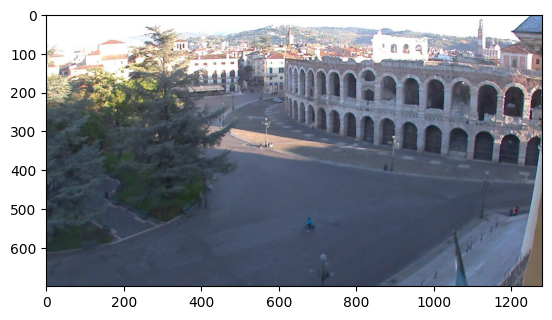

In [121]:
random_img_viz(train_img)

*Penjelasan :*
1. **random_img_viz(train_img)**: Kode program ini bertujuan untuk memvisualisasikan gambar secara acak dari dataset train_img, kemungkinan besar untuk keperluan debugging atau eksplorasi data.

**Langkah 3 - Pra Pengolahan Data**

Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar.

Bualah fungsi berikut untuk menstandarkan ukuran gambar

In [122]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

*Penjelasan :*
1. **def standarized_input(image):**: Mendefinisikan fungsi bernama standarized_input yang menerima satu argumen, yaitu image. Argumen ini diasumsikan sebagai sebuah gambar yang direpresentasikan sebagai array NumPy.
2. **std_img = cv2.resize(image, (1100,600))**: Baris ini melakukan proses resize gambar.
  *   **cv2.resize**: Fungsi dari library OpenCV (cv2) yang digunakan untuk mengubah ukuran gambar.
  *   **image**: Gambar input yang akan diubah ukurannya.
  *   **(1100,600)**: Tuple yang menentukan ukuran baru gambar, yaitu lebar 1100 piksel dan tinggi 600 piksel.
  *   **std_img**: Variabel yang menyimpan hasil resize gambar.
3. **return std_img**: Baris ini mengembalikan gambar yang telah diubah ukurannya (std_img).

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label

In [123]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

*Penjelasan :*
1. **def label_encoder(label):**: Mendirikan sebuah fungsi bernama label_encoder yang menerima satu argumen, yaitu label. Fungsi ini bertujuan untuk mengubah label kategorikal menjadi numerikal.
2. **num_val = 0**: Menetapkan nilai awal variabel num_val menjadi 0. Ini adalah nilai default untuk label 'night'.
3. **if(label == 'day'):**: Memeriksa apakah nilai label sama dengan 'day'.
4. **num_val = 1**: Jika label sama dengan 'day', maka nilai num_val diubah menjadi 1.
5. **return num_val**: Mengembalikan nilai num_val, yang merupakan representasi numerik dari label.

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [124]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

*Penjelasan :*
1. **def preprocess(img_list):**: Mendefinisikan fungsi bernama preprocess yang menerima satu argumen, yaitu img_list. Fungsi ini bertujuan untuk melakukan preprocessing pada data gambar dan label.
2. **std_img_list = []**: Membuat sebuah list kosong bernama std_img_list yang akan digunakan untuk menyimpan gambar dan label yang telah di-preprocess.
3. **for item in img_list:**: Melakukan looping pada setiap elemen dalam img_list. Setiap elemen item diasumsikan sebagai tuple yang berisi gambar dan labelnya.
4. **image = item[0]**: Mengambil gambar dari item dan menyimpannya dalam variabel image.
5. **label = item[1]**: Mengambil label dari item dan menyimpannya dalam variabel label.
6. **std_img = standarized_input(image)**: Memanggil fungsi standarized_input (yang telah dijelaskan sebelumnya) untuk menstandardisasi ukuran gambar. Hasilnya disimpan dalam variabel std_img.
7. **img_label = label_encoder(label)**: Memanggil fungsi label_encoder (yang telah dijelaskan sebelumnya) untuk mengkodekan label. Hasilnya disimpan dalam variabel img_label.
8. **std_img_list.append((std_img, img_label))**: Menambahkan gambar yang telah di-preprocess (std_img) dan label yang telah dikodekan (img_label) sebagai tuple ke dalam list std_img_list.
9. **return std_img_list**: Mengembalikan list std_img_list yang berisi gambar dan label yang telah di-preprocess.

Lakukan pra pengolahan data pada data training.

In [125]:
train_std_img_list = preprocess(train_img)

*Penjelasan :*
1. **train_std_img_list = ...**: Baris ini mendeklarasikan sebuah variabel bernama train_std_img_list yang akan digunakan untuk menyimpan hasil dari pemanggilan fungsi preprocess.
2. **preprocess(train_img)**: Memanggil fungsi preprocess (yang telah kita bahas sebelumnya) dengan train_img sebagai argumen. Fungsi ini akan melakukan preprocessing pada data gambar yang terdapat dalam variabel train_img.

Lakukan pengecekan ukuran gambar secara acak

Anda akan mendapatkan output seperti berikut,

In [126]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 218
(600, 1100, 3)


*Penjelasan :*
1. **pick_random = np.random.randint(0, len(train_std_img_list))**:
  *   **np.random.randint(0, len(train_std_img_list))**: Membuat bilangan bulat acak antara 0 (inklusif) dan panjang train_std_img_list (eksklusif). Ini akan digunakan sebagai indeks untuk memilih gambar secara acak.
  *   **pick_random = ...**: Menyimpan bilangan bulat acak yang dihasilkan ke dalam variabel pick_random.
2. **print(f'Image {pick_random}')**: Mencetak nomor indeks gambar yang dipilih secara acak.
3. **print(train_std_img_list[pick_random][0].shape)**:
  *   **train_std_img_list[pick_random]**: Mengakses elemen dalam train_std_img_list dengan indeks pick_random. Elemen ini diasumsikan sebagai tuple yang berisi gambar dan labelnya.
  *   **[0]**: Mengambil elemen pertama dari tuple, yaitu gambar.
  *   **.shape**: Mendapatkan dimensi (bentuk) gambar dan mencetaknya.

**WARNING!** Perhatikan ukuran (shape) dari data image. Atribut shape akan menampilkan dalam konteks baris (height) x kolom (width)

Lakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.

Hasilnya akan seperti gambar berikut,

Shape	: (600, 1100, 3)
Label	: 1


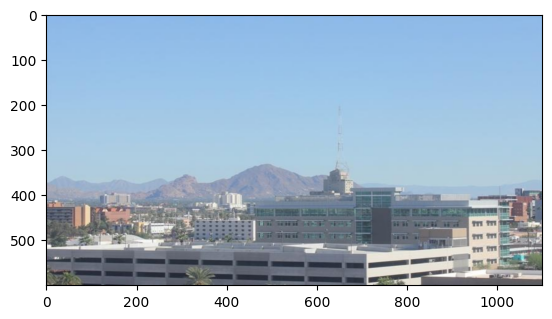

In [127]:
random_img_viz(train_std_img_list)

*Penjelasan :*
1. **random_img_viz(...)**: Memanggil fungsi random_img_viz. Fungsi ini kemungkinan besar telah didefinisikan sebelumnya dan memiliki tujuan untuk memvisualisasikan gambar secara acak.
2. **train_std_img_list**: Argumen yang diberikan kepada fungsi random_img_viz. Argumen ini diasumsikan sebagai sebuah list yang berisi gambar-gambar yang telah distandardisasi dan labelnya (seperti yang dihasilkan oleh fungsi preprocess).

**Langkah 4 - Ekstraksi Fitur**

Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan

In [128]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

*Penjelasan :*
1. **def avg_brightness(image):**: Mendefinisikan fungsi bernama avg_brightness yang menerima satu argumen, yaitu image. Fungsi ini bertujuan untuk menghitung rata-rata kecerahan gambar.
2. **img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)**: Mengubah gambar dari ruang warna RGB ke HSV (Hue, Saturation, Value) menggunakan fungsi cv2.cvtColor dari library OpenCV. Hasilnya disimpan dalam variabel img_hsv.
3. **sum_brightness = np.sum(img_hsv[:,:,2])**: Menghitung jumlah total nilai kecerahan (Value/V channel) dari gambar HSV.
  *   **img_hsv[:,:,2]**: Mengambil semua nilai dari channel V (kecerahan) pada gambar HSV.
  *   **np.sum()**: Menjumlahkan semua nilai dalam array.
4. area = image.shape[0] * image.shape[1]: Menghitung luas gambar dengan mengalikan tinggi (image.shape[0]) dan lebar (image.shape[1]) gambar.
5. **avg = sum_brightness / area**: Menghitung rata-rata kecerahan dengan membagi jumlah total kecerahan (sum_brightness) dengan luas gambar (area).
6. **return avg**: Mengembalikan nilai rata-rata kecerahan (avg).

Lakukan pengecekan pada gambar secara acak. **INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!**

Akan didapatkan hasil output seperti pada gambar

Image 192
Avg Brighness: 143.6629


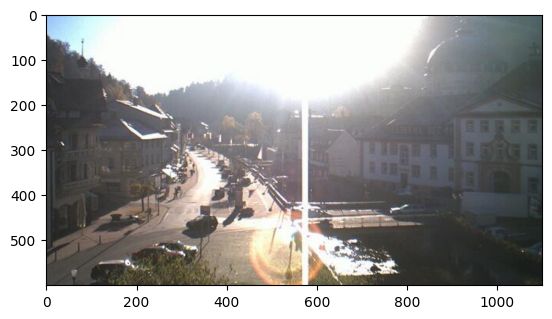

In [129]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

*Penjelasan :*
1. **rand_img = np.random.randint(0, len(train_std_img_list))**:
  *   **np.random.randint(0, len(train_std_img_list))**: Menghasilkan bilangan bulat acak antara 0 (inklusif) dan panjang train_std_img_list (eksklusif). Ini akan digunakan sebagai indeks untuk memilih gambar secara acak.
  *   **rand_img = ...**: Menyimpan bilangan bulat acak yang dihasilkan ke dalam variabel rand_img.
2. **feature_img = train_std_img_list[rand_img][0]**:
  *   **train_std_img_list[rand_img]**: Mengakses elemen dalam train_std_img_list dengan indeks rand_img. Elemen ini diasumsikan sebagai tuple yang berisi gambar dan labelnya.
  *   **[0]**: Mengambil elemen pertama dari tuple, yaitu gambar.
  *   **feature_img = ...**: Menyimpan gambar yang dipilih ke dalam variabel feature_img.
3. **avg_img = avg_brightness(feature_img)**: Memanggil fungsi avg_brightness (yang telah dijelaskan sebelumnya) dengan feature_img sebagai argumen untuk menghitung rata-rata kecerahan gambar. Hasilnya disimpan dalam variabel avg_img.
4. **print(f'Image {rand_img}'):** Mencetak nomor indeks gambar yang dipilih secara acak.
5. **print(f'Avg Brighness: {avg_img:.4f}')**: Mencetak rata-rata kecerahan gambar (avg_img) dengan format 4 angka di belakang koma.
6. **plt.imshow(feature_img)**: Menampilkan gambar (feature_img) menggunakan matplotlib.pyplot.imshow.

**Langkah 5 - Klasifikasi dengan Metode Threshold**

Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

In [130]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

*Penjelasan :*
1. **def predict_label(img, threshold):**: Mendeklarasikan sebuah fungsi bernama predict_label yang menerima dua argumen:
  *   **img**: Gambar yang akan diprediksi labelnya.
  *   **threshold**: Nilai ambang batas yang digunakan untuk menentukan label.
2. **avg = avg_brightness(img)**: Memanggil fungsi avg_brightness (yang telah dijelaskan sebelumnya) untuk menghitung rata-rata kecerahan gambar (img). Hasilnya disimpan dalam variabel avg.
3. **pred = 0**: Menetapkan nilai awal variabel pred menjadi 0. Ini adalah nilai default untuk label (diasumsikan label 0 untuk 'night' atau kondisi gelap).
4. **if avg > threshold:**: Memeriksa apakah rata-rata kecerahan (avg) lebih besar dari nilai ambang batas (threshold).
5. **pred = 1**: Jika rata-rata kecerahan lebih besar dari nilai ambang batas, maka nilai pred diubah menjadi 1 (diasumsikan label 1 untuk 'day' atau kondisi terang).
6. **return pred**: Mengembalikan nilai pred, yang merupakan prediksi label untuk gambar.

Lakukan pengecekan prediksi secara acak pada data training

Hasilnya akan seperti pada gambar

Image 55
Actual label: 0
Predicted label: 0


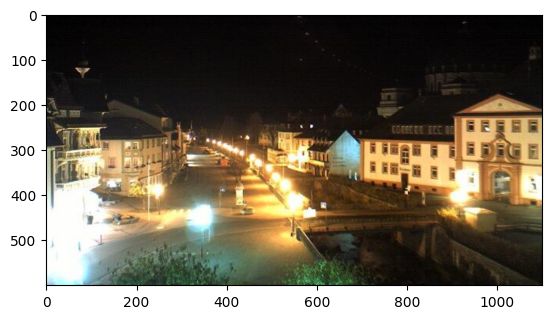

In [131]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

*Penjelasan :*
1. **rand_img = np.random.randint(0, len(train_std_img_list))**:
  *   **np.random.randint(0, len(train_std_img_list))**: Menghasilkan bilangan bulat acak antara 0 (inklusif) dan panjang train_std_img_list (eksklusif) untuk memilih gambar acak.
  *   **rand_img = ...**: Menyimpan bilangan bulat acak ke dalam variabel rand_img.
2. **pred = predict_label(train_std_img_list[rand_img][0], threshold=120)**:
  *   **train_std_img_list[rand_img][0]**: Mengambil gambar dari train_std_img_list dengan indeks rand_img.
  *   **predict_label(...)**: Memanggil fungsi predict_label dengan gambar dan threshold=120 untuk memprediksi label.
  *   **pred = ...**: Menyimpan hasil prediksi ke dalam variabel pred.
3. **print(f'Image {rand_img}')**: Mencetak nomor indeks gambar yang dipilih secara acak.
4. **print(f'Actual label: {train_std_img_list[rand_img][1]}')**: Mencetak label sebenarnya dari gambar yang dipilih.
5. **print(f'Predicted label: {pred}')**: Mencetak label yang diprediksi oleh classifier.
6. **plt.imshow(train_std_img_list[rand_img][0])**: Menampilkan gambar yang dipilih menggunakan matplotlib.pyplot.imshow.

**Langkah 6 - Evaluasi (Manual)**

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep confussion matrix.

Buatlah fungsi berikut,

In [132]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

*Penjelasan :*
1. **def evaluate(img_list, threshold):**: Mendeklarasikan fungsi bernama evaluate yang menerima dua argumen:
  *   **img_list**: List yang berisi tuple gambar dan labelnya.
  *   **threshold**: Nilai ambang batas yang digunakan untuk prediksi.
2. **miss_labels = []**: Membuat list kosong miss_labels untuk menyimpan gambar-gambar yang salah diprediksi beserta label sebenarnya dan prediksinya.
3. **for file in img_list:**: Melakukan iterasi pada setiap elemen (tuple gambar dan label) dalam img_list.
4. **img = file[0]**: Mengambil gambar dari tuple dan menyimpannya dalam variabel img.
5. **label = file[1]**: Mengambil label sebenarnya dari tuple dan menyimpannya dalam variabel label.
6. **pred_label = predict_label(img, threshold)**: Memanggil fungsi predict_label untuk memprediksi label gambar menggunakan threshold yang diberikan. Hasil prediksi disimpan dalam variabel pred_label.
7. **if pred_label != label:**: Memeriksa apakah label prediksi (pred_label) tidak sama dengan label sebenarnya (label).
8. **miss_labels.append((img, pred_label, label))**: Jika prediksi salah, tuple berisi gambar, label prediksi, dan label sebenarnya ditambahkan ke list miss_labels.
9. **total_img = len(img_list)**: Menghitung total gambar dalam img_list.
10. **corr_pred = total_img - len(miss_labels)**: Menghitung jumlah prediksi yang benar dengan mengurangkan jumlah prediksi yang salah (panjang miss_labels) dari total gambar.
11. **accuracy = corr_pred / total_img**: Menghitung akurasi dengan membagi jumlah prediksi yang benar (corr_pred) dengan total gambar (total_img).
12. **return accuracy**: Mengembalikan nilai akurasi.
13. **print(f'Accuracy: {accuracy:.4f}')**: Mencetak  nilai akurasi yang tersimpan dalam variabel accuracy ke konsol.

Lakukan evaluasi pada data training dengan nilai ambang batas 120

Hasilnya adalah,

In [133]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


*Penjelasan :*
1. **evaluate(train_std_img_list, threshold=120)**: Memanggil fungsi evaluate (yang telah dijelaskan sebelumnya) dengan argumen berikut:
  *   **train_std_img_list**: List yang berisi gambar dan label data training yang telah di-preprocess.
  *   **threshold=120**: Nilai ambang batas yang digunakan untuk memprediksi label gambar. Nilai ini akan diteruskan ke fungsi predict_label di dalam fungsi evaluate.

Anda dapat mengubah nilai ambang batas dan amati hasilnya.


Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

Hasil akurasi dari data testing adalah,

In [134]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


*Penjelasan :*
1. **test_img = load_dataset(test_dir)**:
  *   **load_dataset(test_dir)**: Memanggil fungsi load_dataset (diasumsikan telah didefinisikan sebelumnya) untuk memuat data gambar dari direktori test_dir.
  *   **test_img = ...**: Menyimpan data gambar yang dimuat ke dalam variabel test_img.
2. **test_std_img_list = preprocess(test_img)**:
  *   **preprocess(test_img)**: Memanggil fungsi preprocess (yang telah dijelaskan sebelumnya) untuk melakukan preprocessing pada data gambar test_img.
  *   **test_std_img_list = ...**: Menyimpan data gambar yang telah di-preprocess ke dalam variabel test_std_img_list.
3. **evaluate(test_std_img_list, threshold=120)**:
  *   **evaluate(...)**: Memanggil fungsi evaluate (yang telah dijelaskan sebelumnya) untuk mengevaluasi performa model pada data testing.
  *   **test_std_img_list**: Data gambar testing yang telah di-preprocess.
  *   **threshold=120**: Nilai ambang batas yang digunakan untuk memprediksi label gambar.

**Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM** \
Pada proses klasifikasi sebelumnya, kita hanya membedakan kelas day dan night dengan nilai ambang batas. Cara tersebut memang mudah untuk digunakan, akan tetapi belum tentu secara baik dan general dapat memedakan kedua data. Oleh karena itu, pada bagian ini, kita akan mencoba menggunakan pendekatan lain untuk melakukan proses klasifikasi. Kita akan kembali mulai pada langkah 4

**Langkah 4 alternatif - Membuat Feature Vectors**

Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

Buatlah fungsi berikut,

In [135]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

*Penjelasan :*
1. **def extract_avg_bright_feature(img_list):**: Mendeklarasikan fungsi bernama extract_avg_bright_feature yang menerima satu argumen, yaitu img_list. Fungsi ini bertujuan untuk mengekstrak fitur rata-rata kecerahan dan label dari list gambar.
2. **avg_list = []**: Membuat list kosong bernama avg_list untuk menyimpan nilai rata-rata kecerahan dari setiap gambar.
3. **labels = []**: Membuat list kosong bernama labels untuk menyimpan label dari setiap gambar.
4. **for img in img_list:**: Melakukan iterasi pada setiap elemen (tuple gambar dan label) dalam img_list.
5. **img_avg** = avg_brightness(img[0]): Memanggil fungsi avg_brightness (yang telah dijelaskan sebelumnya) untuk menghitung rata-rata kecerahan gambar (img[0]). Hasilnya disimpan dalam variabel img_avg.
6. **nimg_label** = img[1]: Mengambil label gambar (img[1]) dan menyimpannya dalam variabel img_label.
7. **avg_list.append(img_avg)**: Menambahkan nilai rata-rata kecerahan (img_avg) ke list avg_list.
8. **labels.append(img_label)**: Menambahkan label gambar (img_label) ke list labels.
9. **data = np.column_stack((avg_list, labels))**: Menggabungkan list avg_list dan labels menjadi array NumPy 2 dimensi menggunakan np.column_stack. Array ini berisi nilai rata-rata kecerahan dan label untuk setiap gambar.
10. **df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])**: Membuat DataFrame Pandas dari array NumPy data dengan kolom bernama 'AVG_BRIGHT' dan 'LABELS'.
11. **return df**: Mengembalikan DataFrame Pandas df.

Cek hasilnya pada data training,

Maka akan tampil output seperti pada gambar

In [136]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,25.773092,0.0
1,33.761653,0.0
2,27.681806,0.0
3,39.309015,0.0
4,91.782092,0.0


*Penjelasan :*
1. **train_avg_img = extract_avg_bright_feature(train_std_img_list)**:
  *   **extract_avg_bright_feature(train_std_img_list)**: Memanggil fungsi extract_avg_bright_feature (yang telah dijelaskan sebelumnya) dengan train_std_img_list sebagai argumen. Fungsi ini akan mengekstrak fitur rata-rata kecerahan dan label dari data training.
  *   **train_avg_img = ...**: Menyimpan DataFrame yang dihasilkan oleh fungsi extract_avg_bright_feature ke dalam variabel train_avg_img.
2. **print(f'Shape: {train_avg_img.shape}')**: Mencetak dimensi (bentuk) DataFrame train_avg_img menggunakan atribut shape. Outputnya akan berupa tuple yang menunjukkan jumlah baris dan kolom dalam DataFrame.
3. **train_avg_img.head()**: Menampilkan 5 baris pertama dari DataFrame train_avg_img menggunakan method head(). Ini berguna untuk melihat sekilas data yang telah diekstrak.

Lakukan langkah yang serupa pada data testing

Hasilnya adalah seperti pada gambar

In [137]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,185.917073,1.0
1,150.341579,1.0
2,201.607444,1.0
3,194.228062,1.0
4,184.670024,1.0


*Penjelasan :*
1. **test_avg_img = extract_avg_bright_feature(test_std_img_list)**:
  *   **extract_avg_bright_feature(test_std_img_list)**: Memanggil fungsi extract_avg_bright_feature (yang telah dijelaskan sebelumnya) dengan test_std_img_list sebagai argumen. Fungsi ini akan mengekstrak fitur rata-rata kecerahan dan label dari data testing.
  *   **test_avg_img = ...**: Menyimpan DataFrame yang dihasilkan oleh fungsi extract_avg_bright_feature ke dalam variabel test_avg_img.
2. **print(f'Shape: {test_avg_img.shape}')**: Mencetak dimensi (bentuk) DataFrame test_avg_img menggunakan atribut shape. Outputnya akan berupa tuple yang menunjukkan jumlah baris dan kolom dalam DataFrame.
3. **test_avg_img.head()**: Menampilkan 5 baris pertama dari DataFrame test_avg_img menggunakan method head(). Ini berguna untuk melihat sekilas data yang telah diekstrak.

**Langkah 5 alternatif**

Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [138]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

*Penjelasan :*
1. **from sklearn.svm import SVC**: Mengimpor kelas SVC (Support Vector Classifier) dari modul svm dalam library sklearn. Kelas ini digunakan untuk membuat model SVM.
2. **X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)**:
  *   **train_avg_img.iloc[:,0]**: Memilih semua baris ([:]) dan kolom pertama (0) dari DataFrame train_avg_img (fitur rata-rata kecerahan).
  *   **.values**: Mengambil nilai-nilai dari kolom yang dipilih sebagai array NumPy.
  *   **.reshape(-1,1)**: Mengubah bentuk array menjadi array 2 dimensi dengan 1 kolom. -1 menunjukkan bahwa jumlah baris akan dihitung secara otomatis.
  *   **X_train = ...**: Menyimpan array fitur training ke dalam variabel X_train.
3. **y_train = train_avg_img.iloc[:,1]**:
  *   **train_avg_img.iloc[:,1]**: Memilih semua baris ([:]) dan kolom kedua (1) dari DataFrame train_avg_img (label).
  *   **y_train = ...**: Menyimpan label training ke dalam variabel y_train.
4. **X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)**: Sama seperti baris 4, tetapi untuk data testing. Menyimpan array fitur testing ke dalam variabel X_test.
5. **y_test = test_avg_img.iloc[:,1]**: Sama seperti baris 5, tetapi untuk data testing. Menyimpan label testing ke dalam variabel y_test.
6. **model = SVC()**: Membuat objek model SVM menggunakan kelas SVC dengan parameter default. Objek model disimpan dalam variabel model.
7. **model.fit(X_train, y_train)**: Melatih model SVM menggunakan data training (X_train untuk fitur dan y_train untuk label).

**Langkah 6 alternatif**

Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [139]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


*Penjelasan :*
1. **from sklearn.metrics import accuracy_scor**e: Mengimpor fungsi accuracy_score dari modul metrics dalam library sklearn. Fungsi ini digunakan untuk menghitung akurasi model.
2. **y_train_pred = model.predict(X_train)**:
  *   **model.predict(X_train)**: Memprediksi label untuk data training (X_train) menggunakan model SVM yang telah dilatih.
  *   **y_train_pred = ...**: Menyimpan hasil prediksi ke dalam variabel y_train_pred.
3. **acc_train = accuracy_score(y_train, y_train_pred)**:
  *   **accuracy_score(y_train, y_train_pred)**: Menghitung akurasi model pada data training dengan membandingkan label sebenarnya (y_train) dengan label prediksi (y_train_pred).
  *   **acc_train = ...**: Menyimpan nilai akurasi training ke dalam variabel acc_train.
4. **y_test_pred = model.predict(X_test)**: Sama seperti baris 2, tetapi untuk data testing. Menyimpan hasil prediksi untuk data testing ke dalam variabel y_test_pred.
5. **acc_test = accuracy_score(y_test, y_test_pred)**: Sama seperti baris 3, tetapi untuk data testing. Menyimpan nilai akurasi testing ke dalam variabel acc_test.
6. **print(f'Accuracy on train: {acc_train}')**: Mencetak akurasi model pada data training.
7. **print(f'Accuracy on test: {acc_test}')**: Mencetak akurasi model pada data testing.

# Tugas 1 (Opsional)

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

In [140]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Jobsheet 04/Data/voice.csv')

ss, lb = StandardScaler(), LabelEncoder()

X, y = df.drop(columns=['label']), df['label']

X = ss.fit_transform(X)
y = lb.fit_transform(y)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=50)

svm_model = SVC()
svm_model.fit(Xtrain, ytrain)

testPredictResult = svm_model.predict(Xtest)

accuracy = accuracy_score(ytest, testPredictResult)
print(f"Prediction accuracy: {accuracy:.4f}")

Prediction accuracy: 0.9795


2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  1.   Menggunakan data spam.csv
  2.   Fitur CountVectorizer dengan mengaktifkan stop_words
  3.   Evaluasi hasilnya

In [141]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Jobsheet 04/Data/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

X = df['SMS'].values
y = df['Labels'].values

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer(stop_words='english')
X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)


# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

report = classification_report(y_test, y_pred_test, target_names=set(y))

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')
print('Report Klasifikasi\n', report)

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9829596412556054
Report Klasifikasi
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       954
        spam       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  1.   Menggunakan data spam.csv
  2.   Fitur TF-IDF dengan mengaktifkan stop_words
  3.   Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
  4.   Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv


In [142]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Jobsheet 04/Data/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

X = df['SMS'].values
y = df['Labels'].values

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi TfidfVectorizer
bow = TfidfVectorizer(stop_words='english')
X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)


# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

report = classification_report(y_test, y_pred_test, target_names=set(y))

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')
print('Report Klasifikasi\n', report)

Hasil akurasi data train: 0.9842943684092439
Hasil akurasi data test: 0.9605381165919282
Report Klasifikasi
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       954
        spam       1.00      0.73      0.84       161

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



**Kesimpulan**

Berdasarkan data hasil akurasi dan report, CountVectorizer dapat dikatakan model paling relevan dalam kasus ini, tetapi tetap tidak dapat dipungkiri bahwa TfidfVectorizer memiliki lebih banyak opsi spesifik pada definisinya untuk melakukan parsing sebuah text.

# Tugas 2

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [143]:
# Imports relvant modules
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import cv2
import pandas as pd

def getHistogram(imgData):

    # convert it to HSV
    imgData = cv2.cvtColor(imgData, cv2.COLOR_RGB2HSV)

    # pull the histogram
    histogram = cv2.calcHist([imgData], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])

    # normalize and flatten the result
    histogram = cv2.normalize(histogram, None).flatten()
    return histogram

def preprocess(dataset):
    histograms = []
    labels = []

    for data in dataset:
        histogram = getHistogram(data[0])
        label = data[1]

        histograms.append(histogram)
        labels.append(label)

    df = pd.DataFrame(histograms)
    df['LABELS'] = labels

    return df

trainData, testData = preprocess(train_std_img_list), preprocess(test_std_img_list)

Xtrain, ytrain = trainData.iloc[:, :-1].values, trainData['LABELS'].values
Xtest, ytest = testData.iloc[:, :-1].values, testData['LABELS'].values

svm_model = SVC()
svm_model.fit(Xtrain, ytrain)

testPredictResult = svm_model.predict(Xtest)

accuracy = accuracy_score(ytest, testPredictResult)
report = classification_report(ytest, testPredictResult)
print(f"Prediction accuracy: {accuracy}")
print(f"Report\n {report}")

Prediction accuracy: 0.9875
Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       0.99      0.99      0.99        80

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160

